In [1]:


# Importing
# Libraries
import seaborn as sns
sns.set_style('darkgrid')

from pandas import Grouper
from collections import Counter
import joblib
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE,  ADASYN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

# To identify the sentiment of text
import warnings
warnings.filterwarnings('ignore')



In [2]:


df = pd.read_csv('/content/Cleaned_Resumes.csv')
df.drop('Resumes',axis=1, inplace=True)
df



,Profiles,Clean_Resumes
0,Peoplesoft,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,classification internal classification interna...
2,Peoplesoft,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,peoplesoft admin peoplesoft dba ganesh alladi ...
...,...,...
72,Workday,workday integration consultant name sri krishn...
73,Workday,srikanth workday hcm consultant seeking suitab...
74,Workday,workday hcm fcm name kumar role workday consul...
75,Workday,venkateswarlu workday consultant professional ...


In [3]:
df[df.Profiles=='SQL Developer']

,Profiles,Clean_Resumes
42,SQL Developer,anil kumar maddukuri sql msbi developer summar...
43,SQL Developer,aradhana tripathi current location gachibowli ...
44,SQL Developer,buddha vamsi career objective years experience...
45,SQL Developer,kamballa pradeep synopsis looking forward aspi...
46,SQL Developer,hyderabad nazeer basha sql power developer sum...
47,SQL Developer,resume name neeraj mishra experience summary y...
48,SQL Developer,sql developer name bandi prem sai career objec...
49,SQL Developer,sql server developer priyanka professional sum...
50,SQL Developer,sql server developer syam kumar professional s...
51,SQL Developer,raju pavana kumari professional summary years ...



TF-IDF Vectotizer (Converting Text into Features)

In [4]:


tfidf = pd.read_csv('/content/tfidf.csv')
tfidf



,abil,abil work,abil work team,absenc,absenc manag,academ,accentur,accept,accept level,accept level statu,...,year experi workday,year extens,year extens experi,year industri,year industri role,year month,year pass,year profession,year profession experi,year workday
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.019378,0.027142,0.034952,0.049828,0.034952,0.0,0.0,0.030321,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034952,0.036532,0.034952
73,0.021592,0.000000,0.000000,0.096600,0.000000,0.0,0.0,0.033785,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.038945
74,0.000000,0.000000,0.000000,0.024153,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.025686,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75,0.020138,0.000000,0.000000,0.051782,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000



Train Split With Imbalanced Dataset

In [5]:


x = tfidf
y = df['Profiles']



In [6]:


y.unique()



array(['Peoplesoft', 'React Developer', 'SQL Developer', 'Workday'],
      dtype=object)

In [7]:
label_encoder = LabelEncoder()


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,shuffle=True ,stratify=y)

In [9]:


# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'\n','Testing Data',counter_test)



Training Data Counter({'React Developer': 15, 'Peoplesoft': 14, 'Workday': 14, 'SQL Developer': 10}) 
 Testing Data Counter({'React Developer': 7, 'Workday': 7, 'Peoplesoft': 6, 'SQL Developer': 4})


In [10]:


print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)



Shape of X_train:  (53, 5000)
Shape of X_test:  (24, 5000)
Shape of y_train:  (53,)
Shape of y_test (24,)


In [11]:


x_test.to_csv('x_test.csv', index = False)



In [12]:


y_test.to_csv('y_test.csv', index = False)




Building Logistic Regression On Imbalanced Dataset

In [13]:


blr = LogisticRegression(class_weight ='balanced',multi_class='multinomial',solver='lbfgs',C=100.0)
blr_fit = blr.fit(x_train, y_train)
blr_train_predict=blr_fit.predict(x_train)
blr_prediction = blr_fit.predict(x_test)
blr_score = blr_fit.score(x_test,y_test)
print("Logistic Regression Train Accuracy: {}%".format(round(blr_fit.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, blr_train_predict))
print("Classification Report:Train Data\n")
print(classification_report(y_train, blr_train_predict))
print("-----------------------------------------------------------\n")
print("Logistic Regression Test Accuracy: {}%".format(round(blr.score(x_test,y_test)*100,2)))
print(confusion_matrix(y_test, blr_prediction))
blr_cm = confusion_matrix(y_test, blr_prediction)
print("Classification Report:Test Data\n")
print(classification_report(y_test, blr_prediction))



Logistic Regression Train Accuracy: 100.0%
[[14  0  0  0]
 [ 0 15  0  0]
 [ 0  0 10  0]
 [ 0  0  0 14]]
Classification Report:Train Data

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00        14
React Developer       1.00      1.00      1.00        15
  SQL Developer       1.00      1.00      1.00        10
        Workday       1.00      1.00      1.00        14

       accuracy                           1.00        53
      macro avg       1.00      1.00      1.00        53
   weighted avg       1.00      1.00      1.00        53

-----------------------------------------------------------

Logistic Regression Test Accuracy: 100.0%
[[6 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 7]]
Classification Report:Test Data

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         6
React Developer       1.00      1.00      1.00         7
  SQL Developer       1.00      1.00      1.00    

In [14]:


# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))



Mean Accuracy: 0.988 (0.037)


In [15]:
# Saving the pickle file
import pickle
pickle.dump(blr_fit, open('model_evaluation.pkl','wb'))

In [16]:
y_test.to_list()

['SQL Developer',
 'React Developer',
 'React Developer',
 'SQL Developer',
 'Peoplesoft',
 'React Developer',
 'Peoplesoft',
 'Workday',
 'Workday',
 'React Developer',
 'React Developer',
 'SQL Developer',
 'Peoplesoft',
 'Peoplesoft',
 'React Developer',
 'React Developer',
 'Workday',
 'Workday',
 'Workday',
 'SQL Developer',
 'Workday',
 'Workday',
 'Peoplesoft',
 'Peoplesoft']

In [17]:
y_test.unique()

array(['SQL Developer', 'React Developer', 'Peoplesoft', 'Workday'],
      dtype=object)

In [18]:
precision_blr = round(precision_score(y_test,blr_prediction,average = 'macro'),2)
recall_blr = round(recall_score(y_test,blr_prediction, average = 'macro'),2)
f1_blr = round(f1_score(y_test,blr_prediction, average = 'macro'),2)
accuracy_blr = round(accuracy_score(y_test,blr_prediction),2)

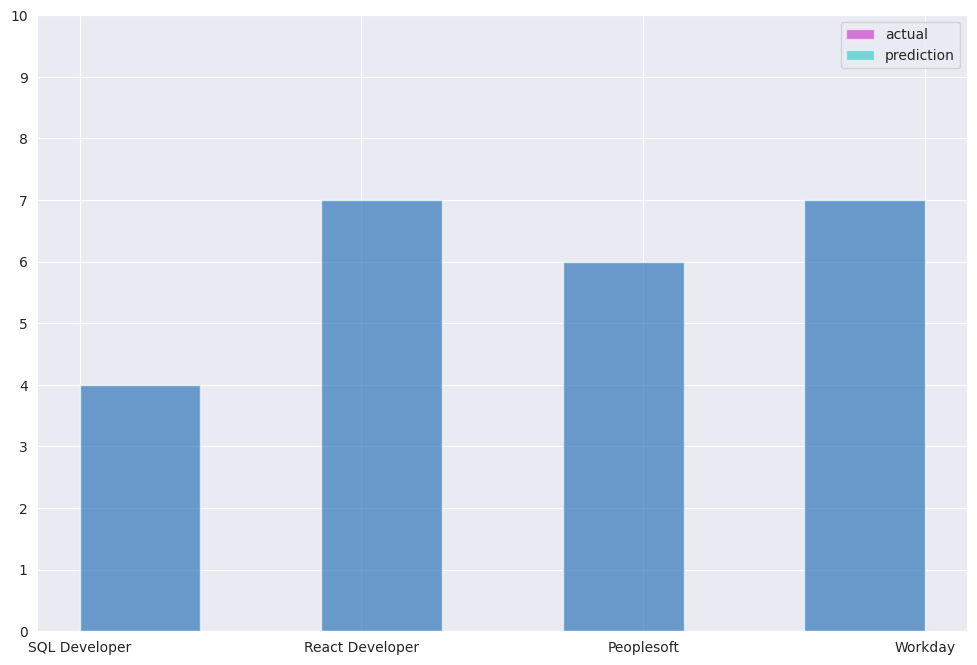

In [19]:


plt.rcParams['figure.figsize'] = (12,8)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(blr_prediction, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()



In [20]:


y_test.unique()



array(['SQL Developer', 'React Developer', 'Peoplesoft', 'Workday'],
      dtype=object)

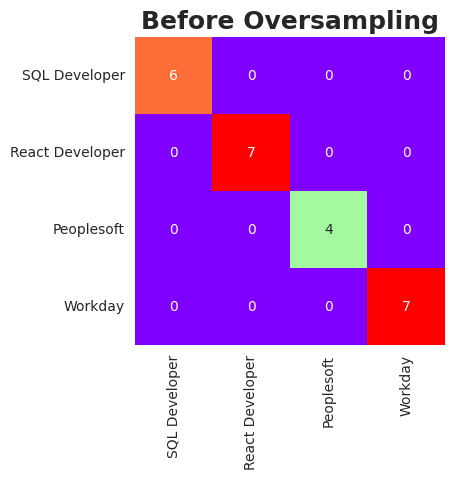

In [21]:


plt.figure(figsize=(4, 4), dpi = 100)

plt.title("Before Oversampling", fontsize = 18, fontweight = 'bold')
sns.heatmap(blr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.show()




Handling imbalance data using SMOTE based techniques
SMOTE Oversampling technique

In [22]:


counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=3)
x_sm, y_sm = smt.fit_resample(x, y)

counter = Counter(y_sm)
print('After',counter)



Before Counter({'React Developer': 22, 'Workday': 21, 'Peoplesoft': 20, 'SQL Developer': 14})
After Counter({'Peoplesoft': 22, 'React Developer': 22, 'SQL Developer': 22, 'Workday': 22})


In [23]:


y_sm.value_counts()



Peoplesoft         22
React Developer    22
SQL Developer      22
Workday            22
Name: Profiles, dtype: int64

In [24]:
final_df = pd.DataFrame()
final_df = x_sm
final_df['Profiles'] = y_sm
final_df

,abil,abil work,abil work team,absenc,absenc manag,academ,accentur,accept,accept level,accept level statu,...,year extens,year extens experi,year industri,year industri role,year month,year pass,year profession,year profession experi,year workday,Profiles
0,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,Peoplesoft
1,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,Peoplesoft
2,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,Peoplesoft
3,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,Peoplesoft
4,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,Peoplesoft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,SQL Developer
84,0.021874,0.0,0.0,0.00000,0.000000,0.011161,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.051504,0.012593,0.0,SQL Developer
85,0.011073,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.035920,0.037543,0.0,SQL Developer
86,0.015130,0.0,0.0,0.00000,0.000000,0.031053,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.035039,0.000000,0.000000,0.0,SQL Developer


In [25]:


final_df.isnull().sum().any()



False

In [26]:


y_sm.value_counts().index



Index(['Peoplesoft', 'React Developer', 'SQL Developer', 'Workday'], dtype='object')

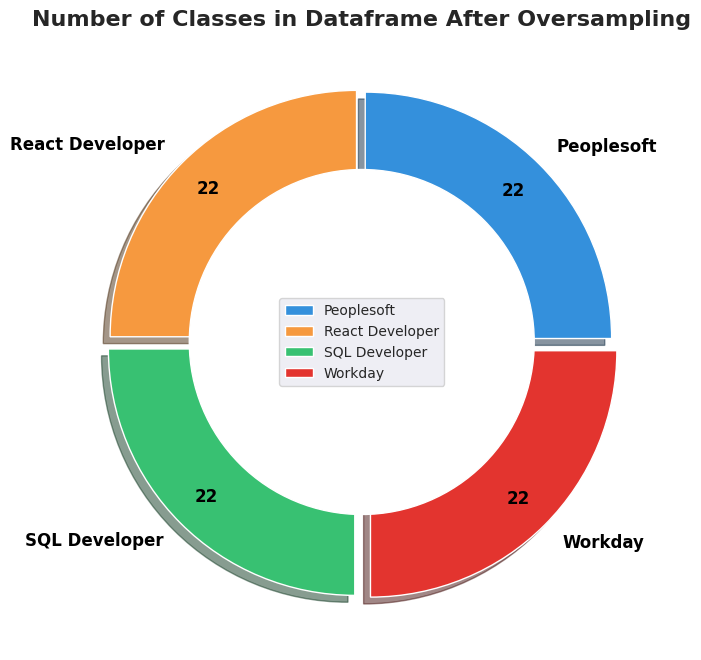

In [27]:
plt.figure(figsize=(12,8))
# Setting size in Chart based on
# given values

sizes = y_sm.value_counts()

# Setting labels for items in Chart
labels = y_sm.value_counts().index

# colors
colors = ['#3490dc', '#f6993f','#38c172', '#e3342f']

# explosion
explode = (0.02, 0.03, 0.04, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct=lambda x: '{:.0f}'.format(x*sizes.sum()/100), shadow=True,
        pctdistance=0.85,
        explode=explode,
        startangle=0,
        textprops = {'size':'large',
                   'fontweight':'bold',

                   'color':'black'})

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Number of Classes in Dataframe After Oversampling', fontsize = 16, fontweight = 'bold')

# Add Legends
plt.legend(labels, loc="center")

# Displaying Chart

plt.show()

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0,shuffle=True,stratify=y_sm)

In [29]:
len(y_train)

61

In [30]:
len(y_test)

27

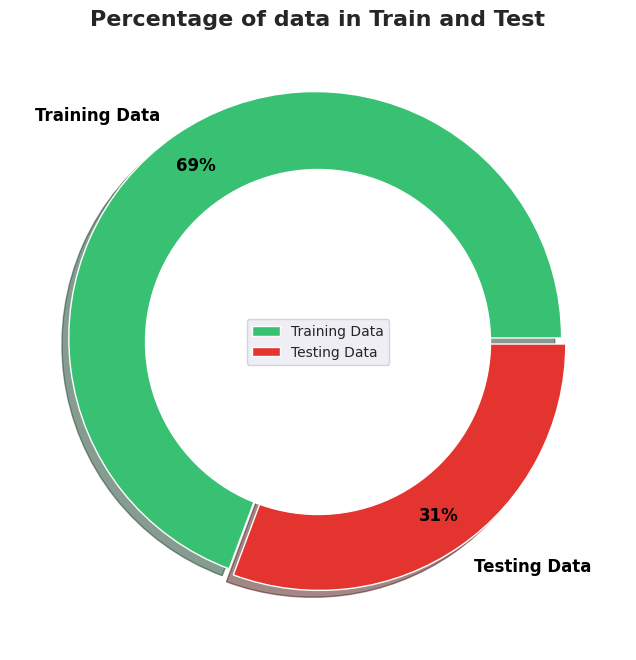

In [31]:
plt.figure(figsize=(12,8))
# Setting size in Chart based on
# given values

sizes = [len(y_train),len(y_test)]

# Setting labels for items in Chart
labels = ['Training Data','Testing Data']

# colors
colors = ['#38c172', '#e3342f']

# explosion
explode = (0.02, 0.01)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        shadow=True,
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode,
        startangle=0,
        textprops = {'size':'large',
                   'fontweight':'bold',

                   'color':'black'})

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Percentage of data in Train and Test', fontsize = 16, fontweight = 'bold')

# Add Legends
plt.legend(labels, loc="center")

# Displaying Chart

plt.show()

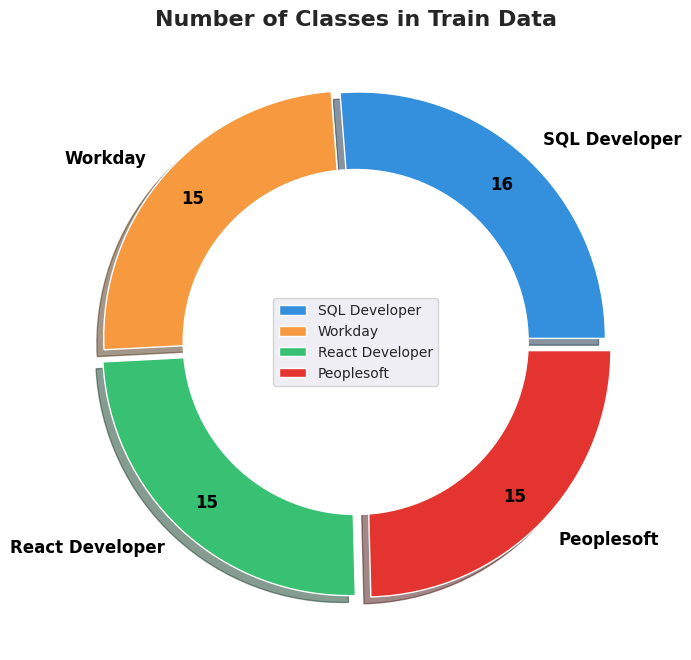

In [32]:


plt.figure(figsize=(12,8))
# Setting size in Chart based on
# given values

sizes = y_train.value_counts()

# Setting labels for items in Chart
labels = y_train.value_counts().index

# colors
colors = ['#3490dc', '#f6993f','#38c172', '#e3342f']

# explosion
explode = (0.02, 0.03, 0.04, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct=lambda x: '{:.0f}'.format(x*sizes.sum()/100), shadow=True,
        pctdistance=0.85,
        explode=explode,
        startangle=0,
        textprops = {'size':'large',
                   'fontweight':'bold',

                   'color':'black'})

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Number of Classes in Train Data', fontsize = 16, fontweight = 'bold')

# Add Legends
plt.legend(labels, loc="center")

# Displaying Chart

plt.show()



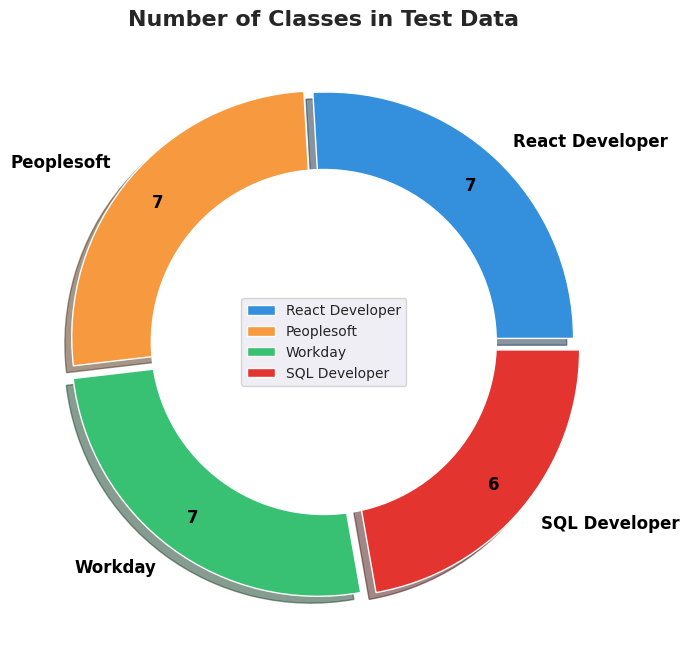

In [33]:


plt.figure(figsize=(12,8))
# Setting size in Chart based on
# given values

sizes = y_test.value_counts()

# Setting labels for items in Chart
labels = y_test.value_counts().index

# colors
colors = ['#3490dc', '#f6993f','#38c172', '#e3342f']

# explosion
explode = (0.02, 0.03, 0.04, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct=lambda x: '{:.0f}'.format(x*sizes.sum()/100), shadow=True,
        pctdistance=0.85,
        explode=explode,
        startangle=0,
        textprops = {'size':'large',
                   'fontweight':'bold',

                   'color':'black'})

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Number of Classes in Test Data', fontsize = 16, fontweight = 'bold')

# Add Legends
plt.legend(labels, loc="center")

# Displaying Chart

plt.show()



In [34]:


# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)



Training Data Counter({'SQL Developer': 16, 'Workday': 15, 'React Developer': 15, 'Peoplesoft': 15}) Testing Data Counter({'React Developer': 7, 'Peoplesoft': 7, 'Workday': 7, 'SQL Developer': 6})


In [35]:


print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)



Shape of X_train:  (61, 5001)
Shape of X_test:  (27, 5001)
Shape of y_train:  (61,)
Shape of y_test (27,)



Stratified Kfold Cross Validation Report Before Oversampling

In [36]:


# Create  classifier object.
log_reg = LogisticRegression()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    log_reg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(log_reg.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

List of possible accuracy: [0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 87.5 %

Overall Accuracy: 98.75 %

Standard Deviation is: 0.0375


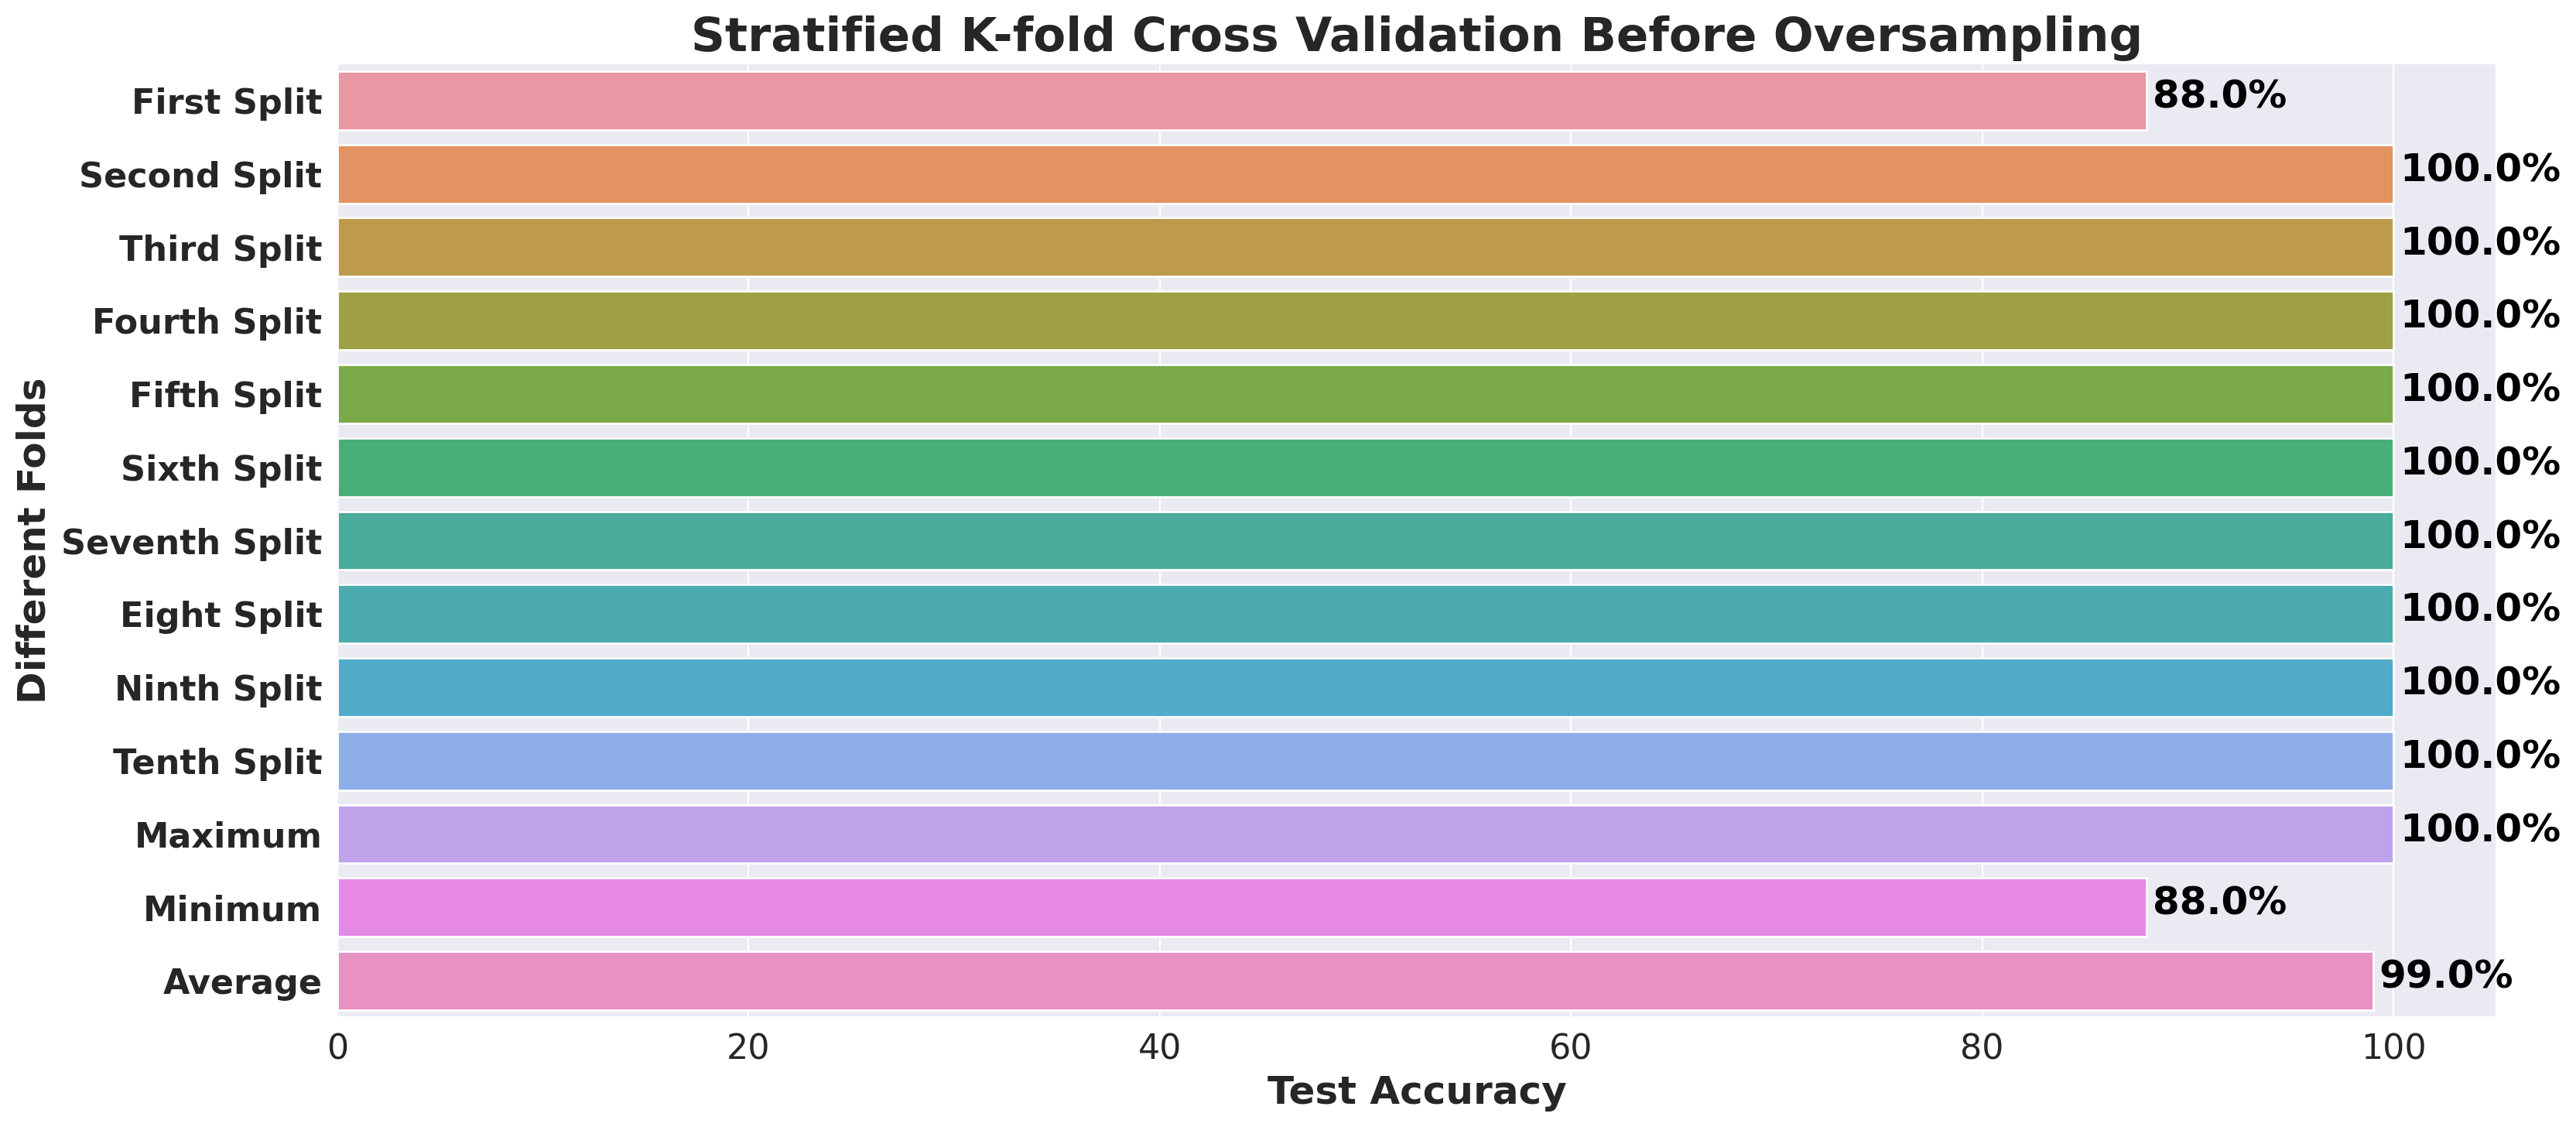

In [37]:


before_oversampling = pd.DataFrame({"Folds":pd.Series(['First Split','Second Split','Third Split','Fourth Split','Fifth Split','Sixth Split','Seventh Split','Eight Split','Ninth Split','Tenth Split','Maximum','Minimum','Average']),
                                                        "Accuracy":pd.Series([0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, max(lst_accu_stratified), min(lst_accu_stratified), np.mean(lst_accu_stratified)])})
before_oversampling['Accuracy'] = before_oversampling['Accuracy'].apply(lambda x: round(x*100,0))

f, axe = plt.subplots(1,1, figsize=(18,8), dpi=200)
sns.barplot(x='Accuracy', y='Folds', data=before_oversampling, ax = axe)
axe.set_xlabel('Test Accuracy', size=18, fontweight = 'bold')
axe.set_ylabel('Different Folds', size=18, fontweight = 'bold')
plt.title("Stratified K-fold Cross Validation Before Oversampling", size=22, fontweight = 'bold' )
plt.yticks(fontsize=16,fontweight = 'bold')
plt.xticks(fontsize=16)

for i, v in enumerate(before_oversampling['Accuracy'].values):
    axe.text(v + 0.3 , i + .10, str(v)+'%',
            color = 'black', fontweight = 'bold', fontsize= 18)

plt.show()



Stratified Kfold Cross Validation Report After Oversampling

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

# Assuming 'Peoplesoft' is a categorical column in your dataset
# Convert categorical variables to one-hot encoded columns
encoder = OneHotEncoder(sparse=False)
x_sm_encoded = encoder.fit_transform(x_sm)
# Create classifier object
log_reg = LogisticRegression()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_sm_encoded, y_sm):
    x_train_fold, x_test_fold = x_sm_encoded[train_index], x_sm_encoded[test_index]
    y_train_fold, y_test_fold = y_sm[train_index], y_sm[test_index]
    log_reg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(log_reg.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))



List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 1.0, 0.875, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 87.5 %

Overall Accuracy: 96.52777777777779 %

Standard Deviation is: 0.053160164469457344


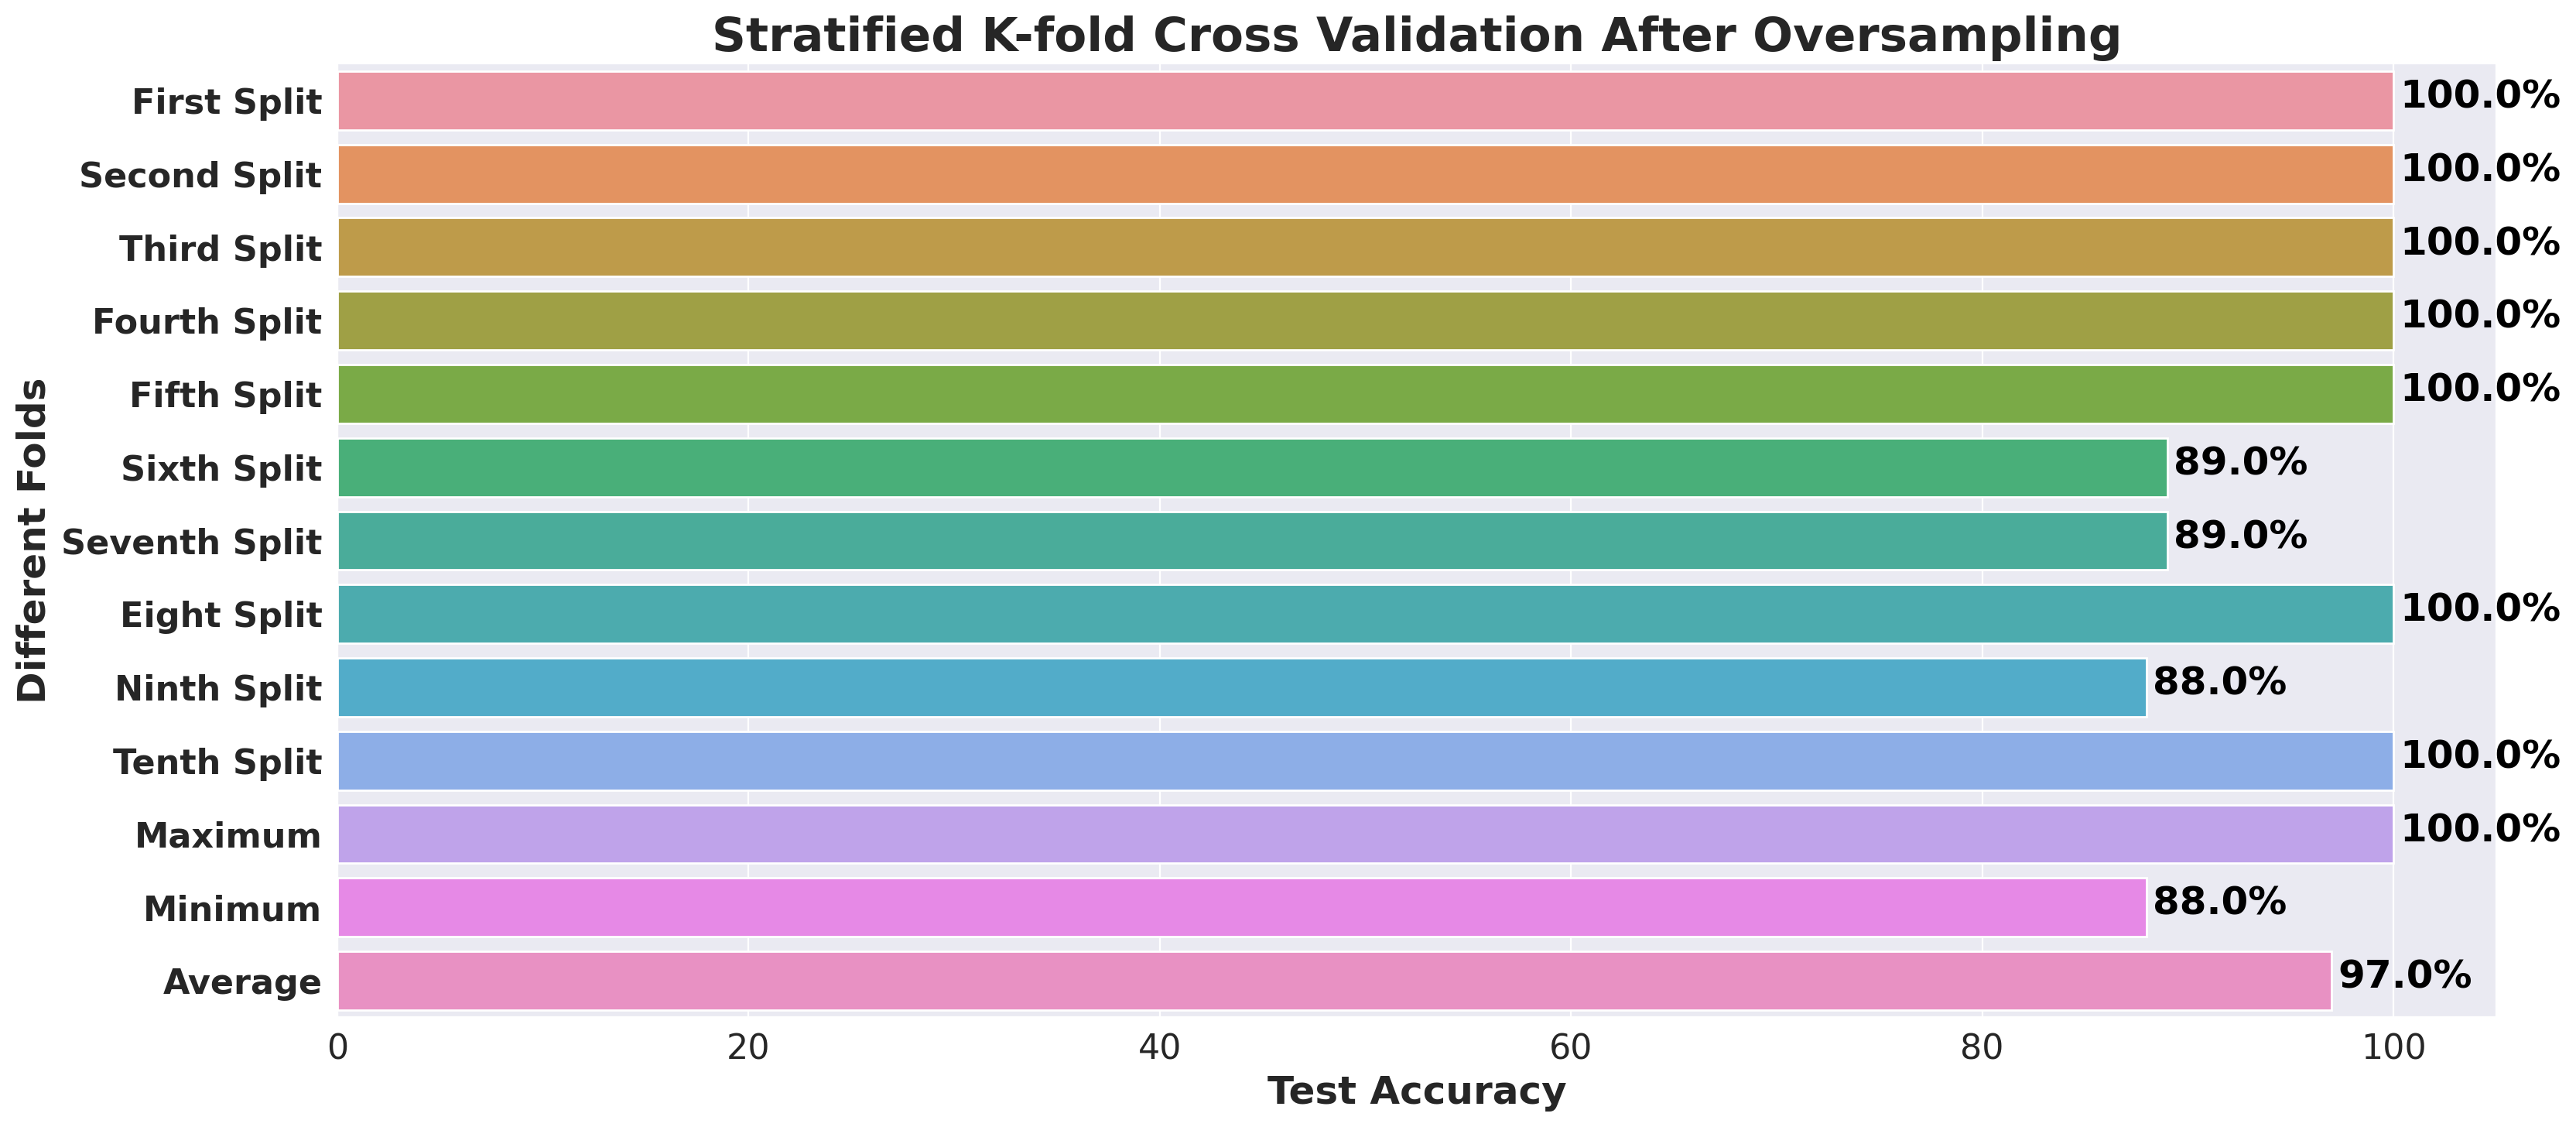

In [39]:


after_oversampling = pd.DataFrame({"Folds":pd.Series(['First Split','Second Split','Third Split','Fourth Split','Fifth Split','Sixth Split','Seventh Split','Eight Split','Ninth Split','Tenth Split','Maximum','Minimum','Average']),
                                                        "Accuracy":pd.Series([1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 1.0, 0.875, 1.0, max(lst_accu_stratified), min(lst_accu_stratified), np.mean(lst_accu_stratified)])})
after_oversampling['Accuracy'] = after_oversampling['Accuracy'].apply(lambda x: round(x*100,0))

f, axe = plt.subplots(1,1, figsize=(18,8), dpi=200)
sns.barplot(x='Accuracy', y='Folds', data=after_oversampling, ax = axe)
axe.set_xlabel('Test Accuracy', size=18, fontweight = 'bold')
axe.set_ylabel('Different Folds', size=18, fontweight = 'bold')
plt.title("Stratified K-fold Cross Validation After Oversampling", size=22, fontweight = 'bold' )
plt.yticks(fontsize=16,fontweight = 'bold')
plt.xticks(fontsize=16)

for i, v in enumerate(after_oversampling['Accuracy'].values):
    axe.text(v + 0.3 , i + .10, str(v)+'%',
            color = 'black', fontweight = 'bold', fontsize= 18)


1. K-NEAREST NEIGHBOUR (KNN) CLASSIFICATION MODEL

Grid search for choosing the best Value of K


In [40]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Role' is a categorical column in your dataset
# Convert categorical variables to one-hot encoded columns
encoder = OneHotEncoder(sparse=False)
x_encoded = encoder.fit_transform(x)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=1)


# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []
# Create KNN classifier object
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(x_train, y_train)

pred_i = knn.predict(x_test)
    #pred_i = pred_i.reshape(27,1)
score = cross_val_score(knn,x_train, y_train,cv=10)
mean_scores.append(np.mean(score))
error_rate.append(np.mean(pred_i != y_test))


In [41]:


mean_scores



[0.2785714285714286]

In [42]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [43]:


model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =5)
grid.fit(x_sm_encoded, y_sm)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [44]:



print(grid.best_score_)
print(grid.best_params_)



0.37973856209150325
{'n_neighbors': 3}


In [45]:

#import pandas as pd
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import OneHotEncoder

# Assuming 'Role' is a categorical column in your dataset
# Convert categorical variables to one-hot encoded columns
#encoder = OneHotEncoder(sparse=False)
#x_encoded = encoder.fit_transform(x_sm)

# Create KNN classifier object
#knn = KNeighborsClassifier()

# Define the parameter grid for grid search
#param_grid = {'n_neighbors': [3, 5, 7]}

# Perform grid search with cross-validation
#grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
#grid.fit(x_encoded, y_sm)

# Get the best model and its parameters
#best_model = grid.best_estimator_
#best_params = grid.best_params_

# Print the best model and its parameters
#print("Best Model:", best_model)
#print("Best Parameters:", best_params)



In [46]:


print(grid.best_score_)
print(grid.best_params_)



0.37973856209150325
{'n_neighbors': 3}


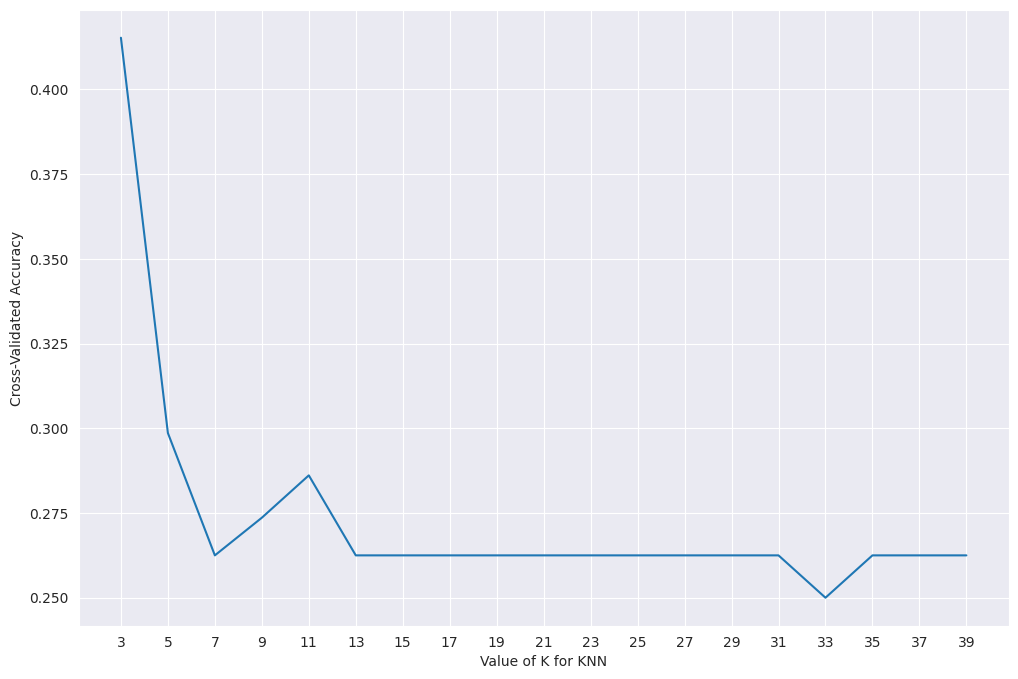

In [47]:



import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_sm_encoded, y_sm, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()


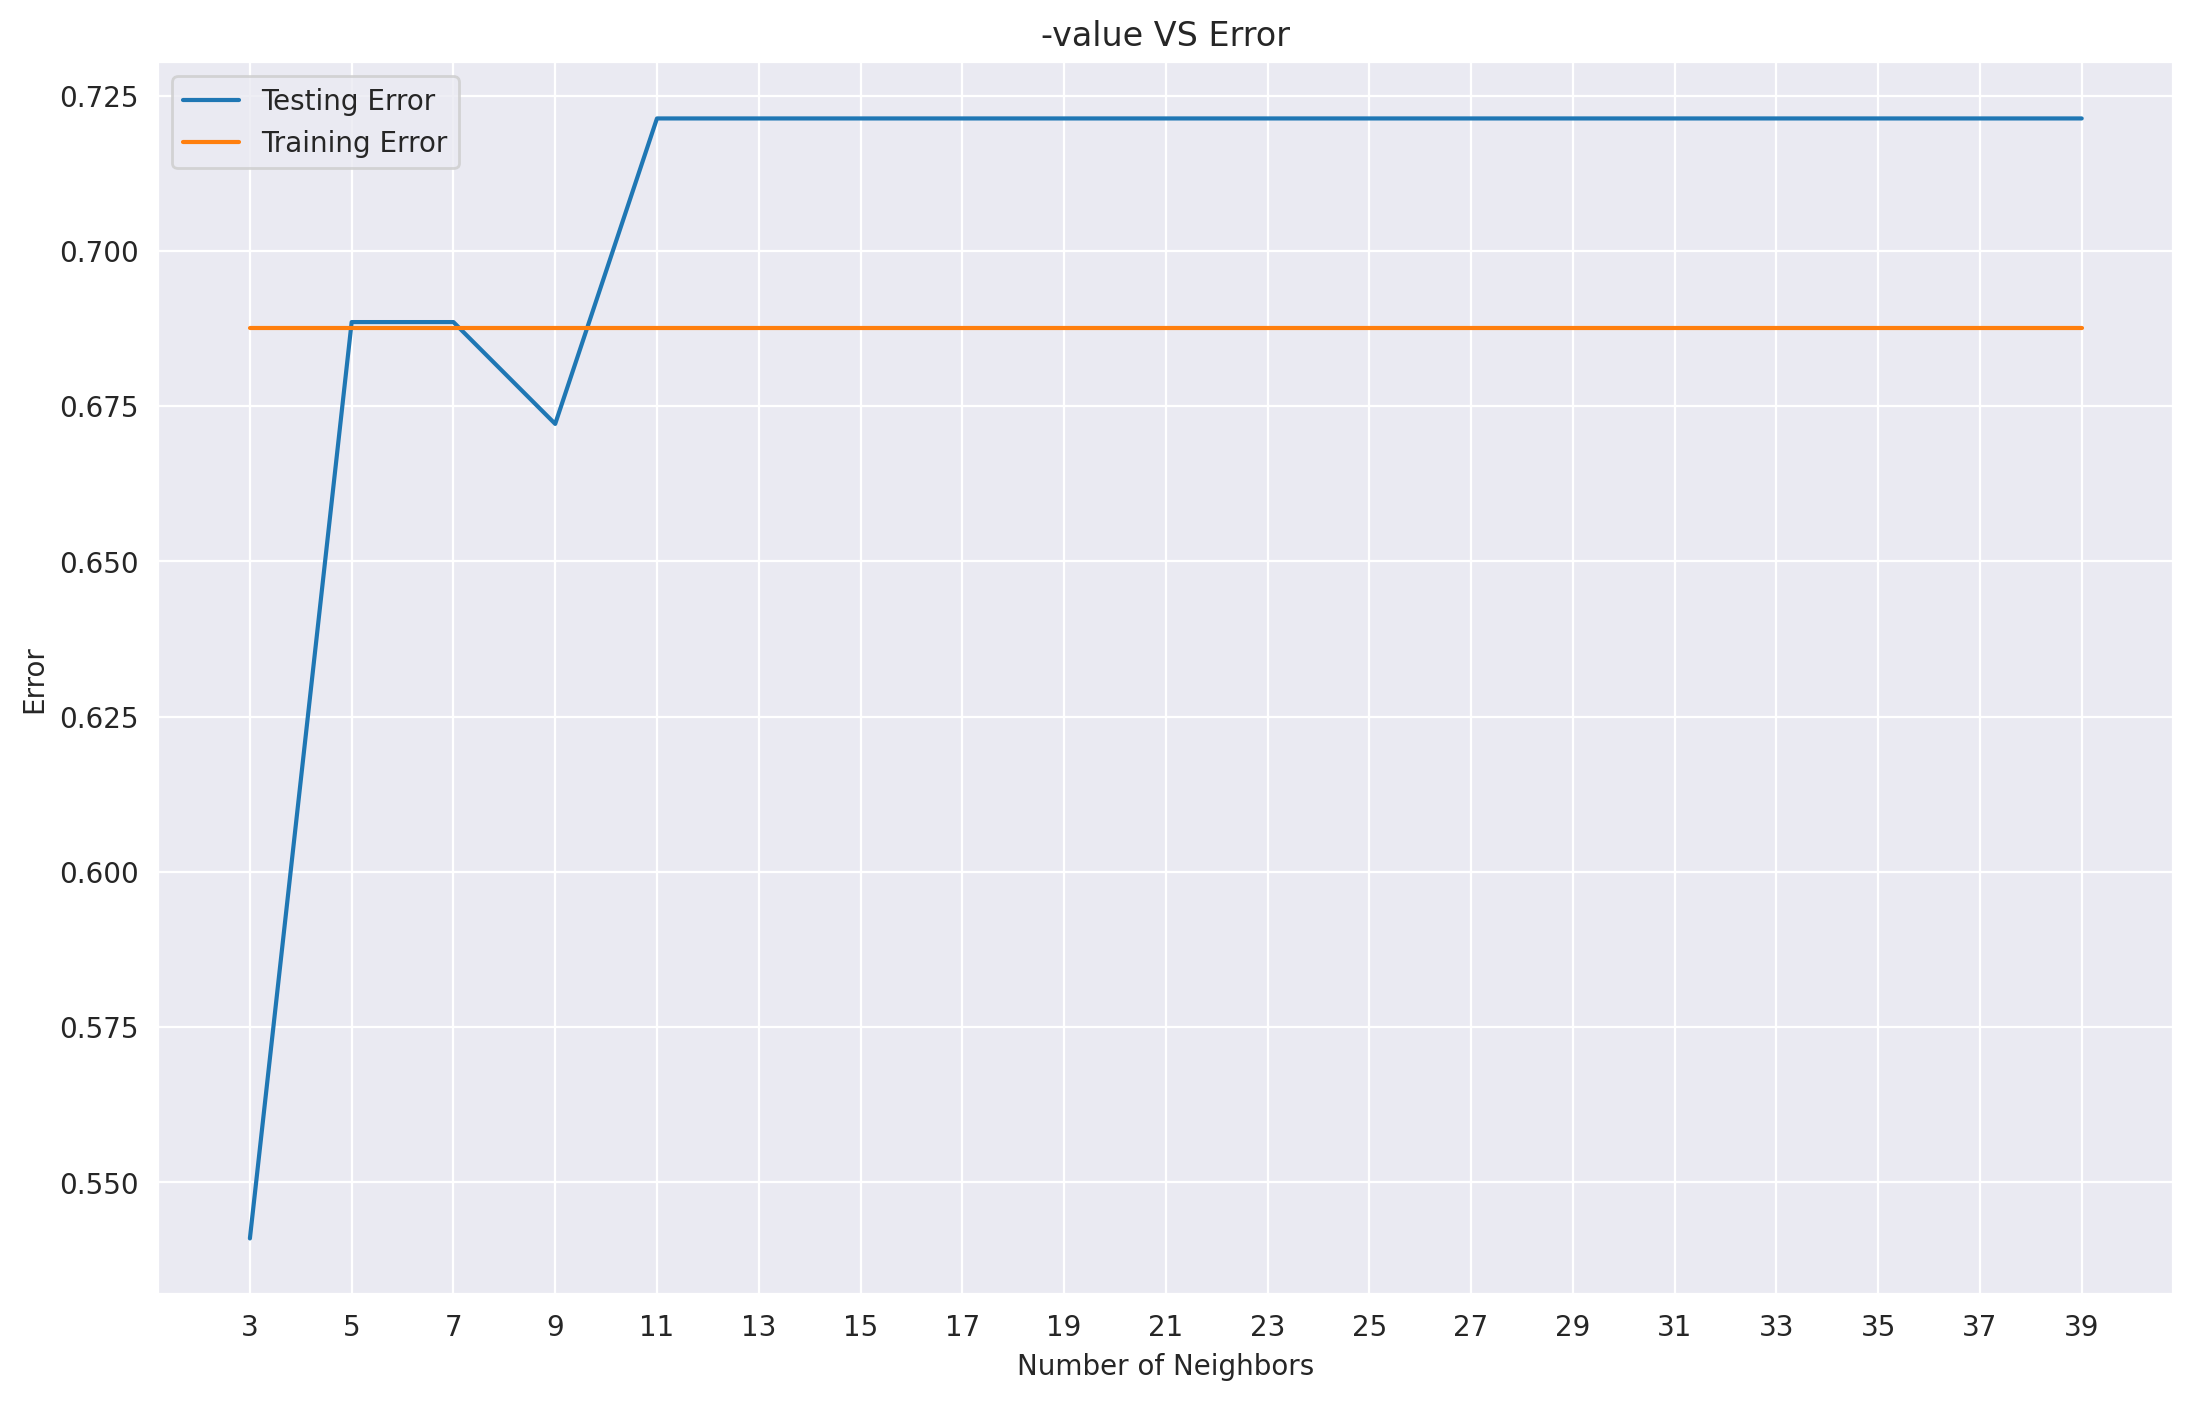

In [48]:


error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    #y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    #y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8], dpi=200)
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()



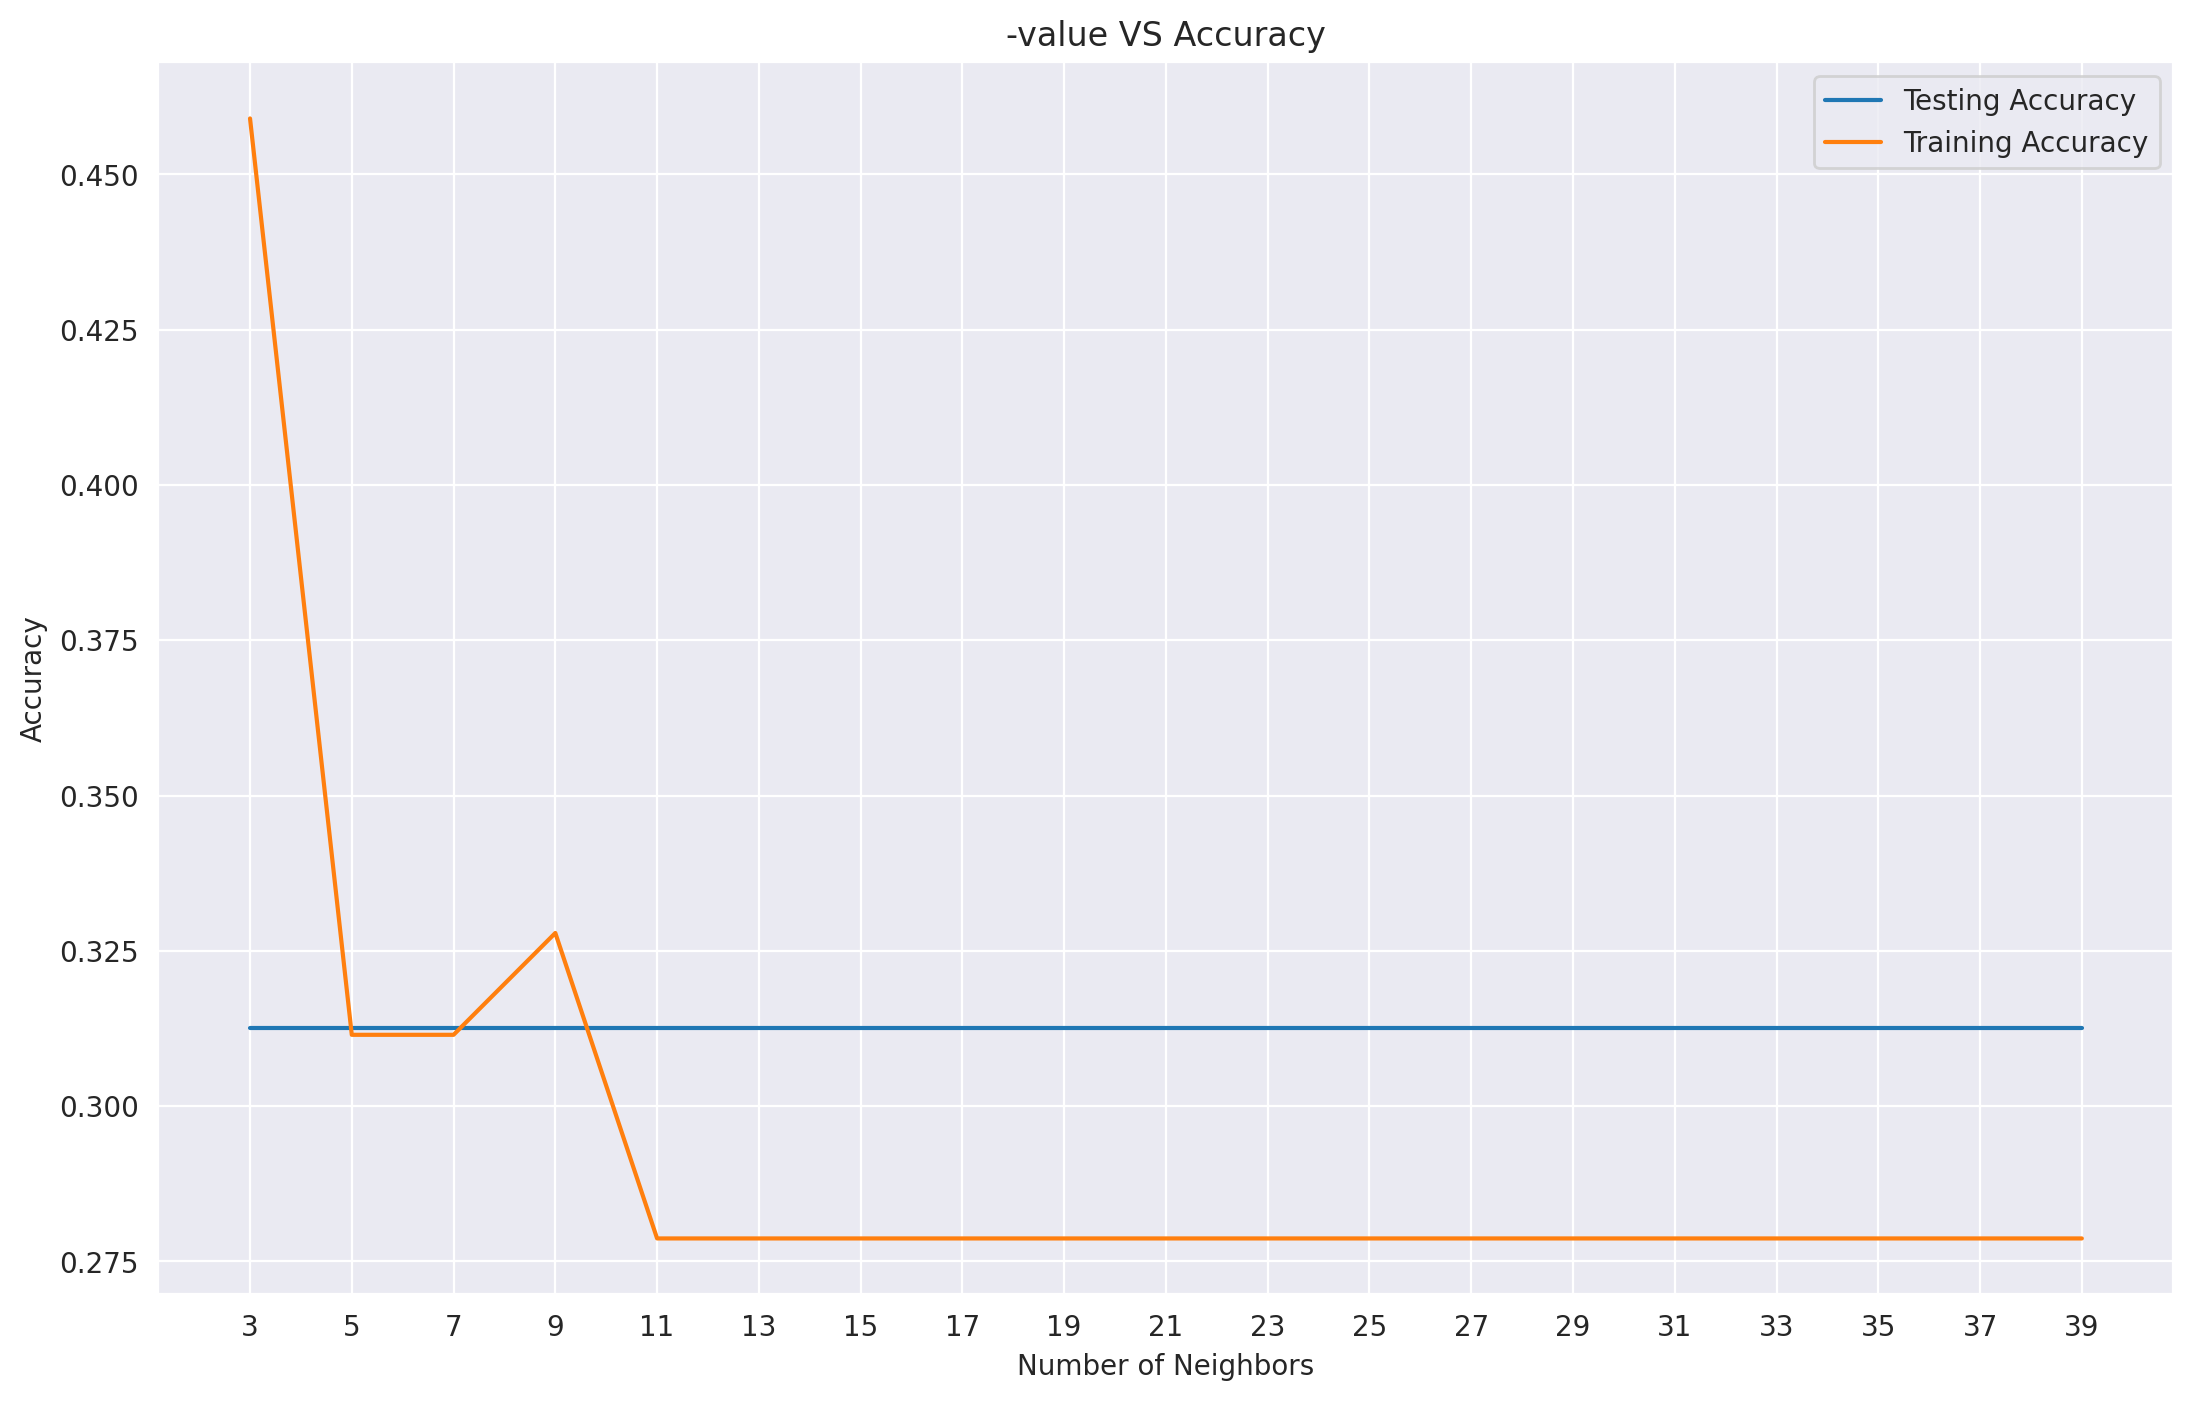

In [49]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8], dpi = 200)
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
# plt.savefig('graph.png')
plt.show()

In [50]:


knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=2))
knn_fit = knn.fit(x_train, y_train)
knn_train_predict=knn_fit.predict(x_train)
knn_prediction = knn_fit.predict(x_test)
knn_score = knn_fit.score(x_test, y_test)
knn_cm = confusion_matrix(y_test, knn_prediction)
print("KNN Classification Train Accuracy: {}%".format(round(knn_fit.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, knn_train_predict))
print('Classification Report:\n')
print(classification_report(y_train, knn_train_predict))
print("-----------------------------------------------------------\n")
print("KNN Classification Test Accuracy: {}%".format(round(knn_fit.score(x_test,y_test)*100,2)))
print(confusion_matrix(y_test, knn_prediction))
print('Classification Report:\n')
print(classification_report(y_test, knn_prediction))



KNN Classification Train Accuracy: 73.77%
[[ 2 16  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.11      0.20        18
React Developer       0.52      1.00      0.68        17
  SQL Developer       1.00      1.00      1.00        11
        Workday       1.00      1.00      1.00        15

       accuracy                           0.74        61
      macro avg       0.88      0.78      0.72        61
   weighted avg       0.86      0.74      0.67        61

-----------------------------------------------------------

KNN Classification Test Accuracy: 31.25%
[[0 2 0 0]
 [0 5 0 0]
 [0 3 0 0]
 [0 6 0 0]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         2
React Developer       0.31      1.00      0.48         5
  SQL Developer       0.00      0.00      0.00         3
        Workda

In [51]:


precision_knn = round(precision_score(y_test,knn_prediction,average = 'macro'),2)
recall_knn = round(recall_score(y_test,knn_prediction, average = 'macro'),2)
f1_knn = round(f1_score(y_test,knn_prediction, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,knn_prediction),2)



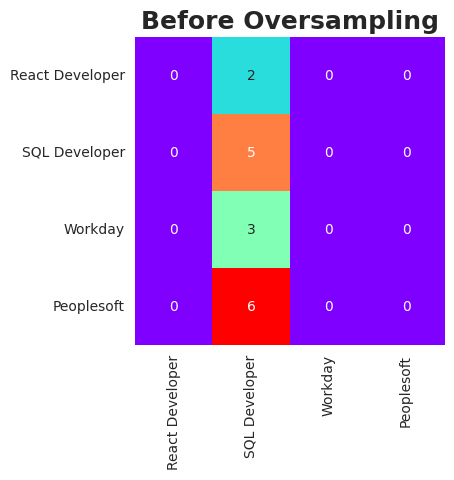

In [52]:


plt.figure(figsize=(4, 4), dpi = 100)

plt.title("Before Oversampling", fontsize = 18, fontweight = 'bold')
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.show()



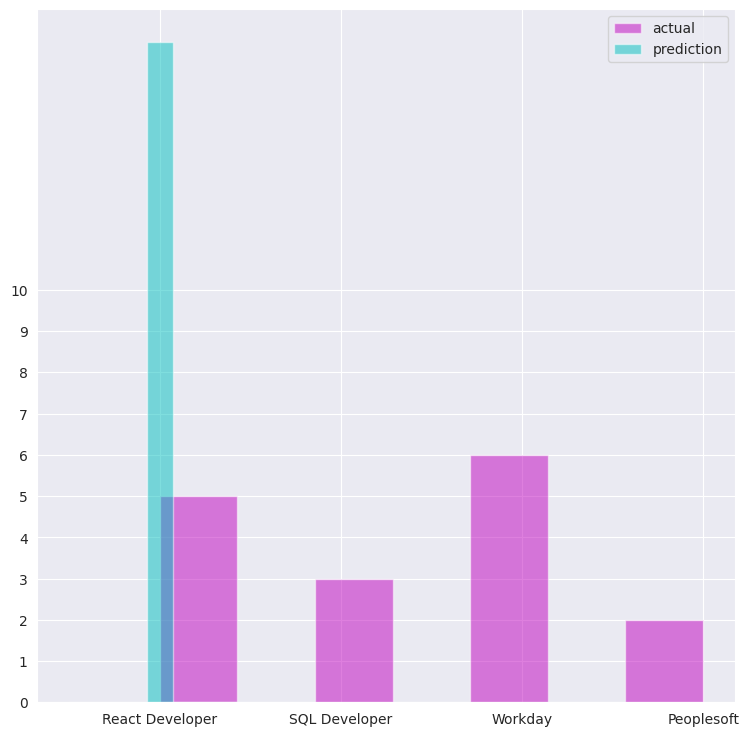

In [53]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(knn_prediction, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()


2.) XGB Classifier

In [54]:


from xgboost import XGBClassifier
xgb_classifer= OneVsRestClassifier(XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005))
xgb_fit = xgb_classifer.fit(x_train,y_train)
xgb_train_prediction = xgb_fit.predict(x_train)
xgb_prediction = xgb_fit.predict(x_test)
xgb_score = xgb_fit.score(x_test, y_test)
print("XGB Classification Train Accuracy: {}%".format(round(xgb_fit.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, xgb_train_prediction))
print('Classification Report:\n')
print(classification_report(y_train, xgb_train_prediction))
print("-----------------------------------------------------------\n")
print("XGB Classification Test Accuracy: {}%".format(round(xgb_fit.score(x_test,y_test)*100,2)))
xgb_cm = confusion_matrix(y_test, xgb_prediction)
print(confusion_matrix(y_test, xgb_prediction))
print("Classification Report:\n")
print(classification_report(y_test, xgb_prediction))



XGB Classification Train Accuracy: 100.0%
[[18  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00        18
React Developer       1.00      1.00      1.00        17
  SQL Developer       1.00      1.00      1.00        11
        Workday       1.00      1.00      1.00        15

       accuracy                           1.00        61
      macro avg       1.00      1.00      1.00        61
   weighted avg       1.00      1.00      1.00        61

-----------------------------------------------------------

XGB Classification Test Accuracy: 100.0%
[[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 6]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00      1.00         3
        Workda

In [55]:


precision_xgb = round(precision_score(y_test,xgb_prediction,average = 'macro'),2)
recall_xgb = round(recall_score(y_test,xgb_prediction, average = 'macro'),2)
f1_xgb = round(f1_score(y_test,xgb_prediction, average = 'macro'),2)
accuracy_xgb = round(accuracy_score(y_test,xgb_prediction),2)





3. Random Forest Classifier
a) Randomized Search Cross Validation

In [56]:


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



In [57]:


n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Peoplesoft  React Developer  SQL Developer  Workday  accuracy  \
precision         1.0              1.0            1.0      1.0       1.0   
recall            1.0              1.0            1.0      1.0       1.0   
f1-score          1.0              1.0            1.0      1.0       1.0   
support          18.0             17.0           11.0     15.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support         61.0          61.0  
_______________________________________________
Confusion Matrix: 
 [[18  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 

In [58]:


rf =RandomForestClassifier(n_estimators=195,min_samples_split=2, min_samples_leaf=4,criterion='entropy',
                           max_depth=50, max_features='auto',random_state=42, bootstrap=True,
                           class_weight="balanced")
rf_fit = rf.fit(x_train, y_train)
rf_train_prediction = rf_fit.predict(x_train)
rf_prediction = rf_fit.predict(x_test)
rf_score = rf_fit.score(x_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf_fit.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, rf_train_prediction))
print("Classification Report:Train Data\n")
print(classification_report(y_train, rf_train_prediction))
print("-----------------------------------------------------------\n")
print("Random Forest Classification Test Accuracy: {}%".format(round(rf_fit.score(x_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print(confusion_matrix(y_test, rf_prediction))
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))



Random Forest Classification Train Accuracy: 100.0%
[[18  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]
Classification Report:Train Data

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00        18
React Developer       1.00      1.00      1.00        17
  SQL Developer       1.00      1.00      1.00        11
        Workday       1.00      1.00      1.00        15

       accuracy                           1.00        61
      macro avg       1.00      1.00      1.00        61
   weighted avg       1.00      1.00      1.00        61

-----------------------------------------------------------

Random Forest Classification Test Accuracy: 100.0%
[[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 6]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00     

In [59]:


precision_rf = round(precision_score(y_test,rf_prediction,average = 'macro'),2)
recall_rf = round(recall_score(y_test,rf_prediction, average = 'macro'),2)
f1_rf = round(f1_score(y_test,rf_prediction, average = 'macro'),2)
accuracy_rf = round(accuracy_score(y_test,rf_prediction),2)



In [60]:


# Create  classifier object.
rf_class = RandomForestClassifier()

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_sm_encoded = label_encoder.fit_transform(y_sm)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_sm_encoded, y_sm_encoded):
    x_train_fold, x_test_fold = x_sm_encoded[train_index], x_sm_encoded[test_index]
    y_train_fold, y_test_fold = y_sm_encoded[train_index], y_sm_encoded[test_index]
    rf_fit = rf_class.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(round(f1_score(y_test_fold, rf_fit.predict(x_test_fold), average='macro')))

# Print the output.
print('List of possible F1 Score:', lst_accu_stratified)
print('\nMaximum F1 Score That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum F1 Score:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall F1 Score:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))




List of possible F1 Score: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Maximum F1 Score That can be obtained from this model is: 100 %

Minimum F1 Score: 100 %

Overall F1 Score: 100.0 %

Standard Deviation is: 0.0



4.) Logistic Regression

In [61]:


lr = LogisticRegression(class_weight ='balanced',multi_class='ovr',solver='lbfgs',C=100.0)
lr_fit = lr.fit(x_train, y_train)
lr_train_predict= lr_fit.predict(x_train)
lr_prediction = lr_fit.predict(x_test)
lr_score = lr_fit.score(x_test,y_test)
lr_cm = confusion_matrix(y_test, lr_prediction)
print("Logistic Regression Train Accuracy: {}%".format(round(lr_fit.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, lr_train_predict))
print("Classification Report:Train Data\n")
print(classification_report(y_train, lr_train_predict))
print("-----------------------------------------------------------\n")
print("Logistic Regression Test Accuracy: {}%".format(round(lr_fit.score(x_test,y_test)*100,2)))
print(confusion_matrix(y_test, lr_prediction))
print("Classification Report:Test Data\n")
print(classification_report(y_test, lr_prediction))



Logistic Regression Train Accuracy: 100.0%
[[18  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]
Classification Report:Train Data

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00        18
React Developer       1.00      1.00      1.00        17
  SQL Developer       1.00      1.00      1.00        11
        Workday       1.00      1.00      1.00        15

       accuracy                           1.00        61
      macro avg       1.00      1.00      1.00        61
   weighted avg       1.00      1.00      1.00        61

-----------------------------------------------------------

Logistic Regression Test Accuracy: 100.0%
[[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 6]]
Classification Report:Test Data

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00      1.00    

In [62]:
precision_lr = round(precision_score(y_test,lr_prediction,average = 'macro'),2)
recall_lr = round(recall_score(y_test,lr_prediction, average = 'macro'),2)
f1_lr = round(f1_score(y_test,lr_prediction, average = 'macro'),2)
accuracy_lr = round(accuracy_score(y_test,lr_prediction),2)

In [63]:
%matplotlib inline

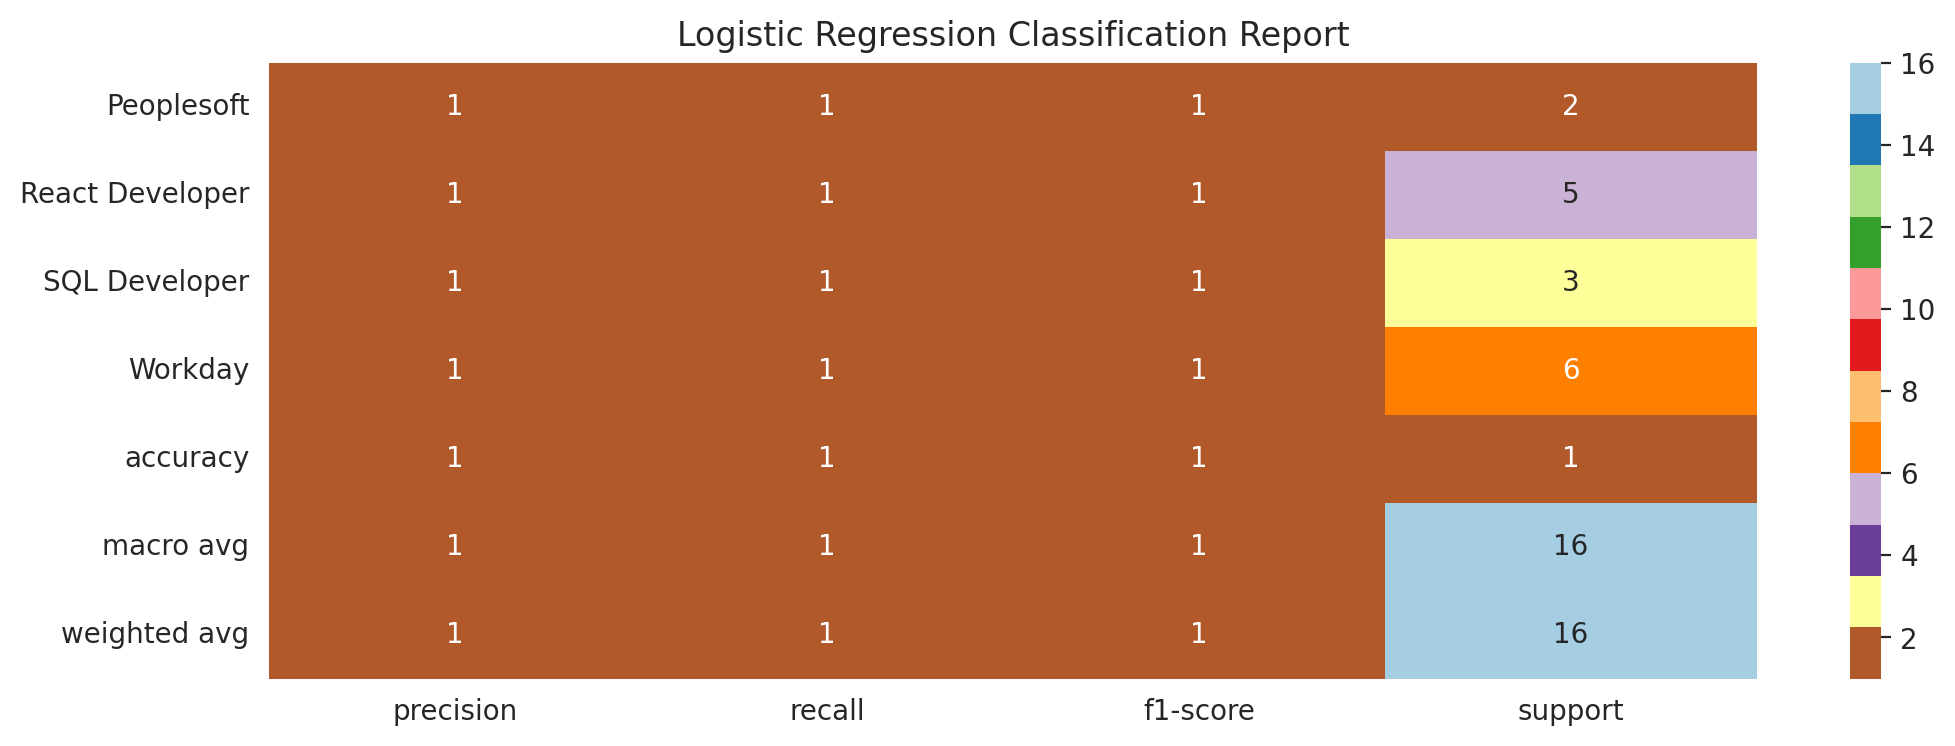

In [64]:


clf_report = classification_report(y_test, lr_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(12,4), dpi=200)
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap="Paired_r")
plt.title("Logistic Regression Classification Report")
plt.show()



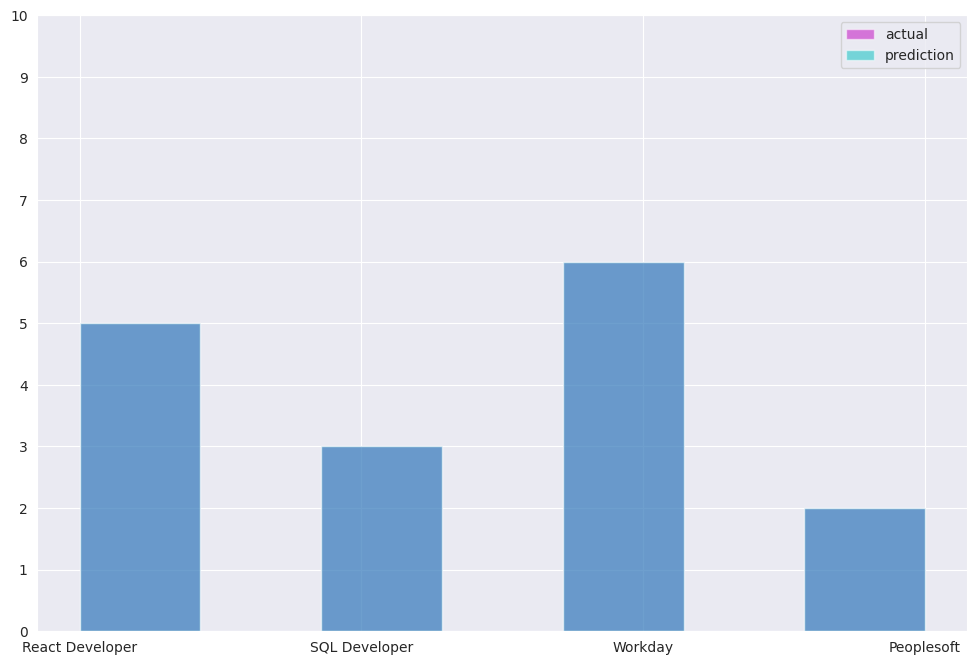

In [65]:


plt.rcParams['figure.figsize'] = (12,8)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(lr_prediction, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()



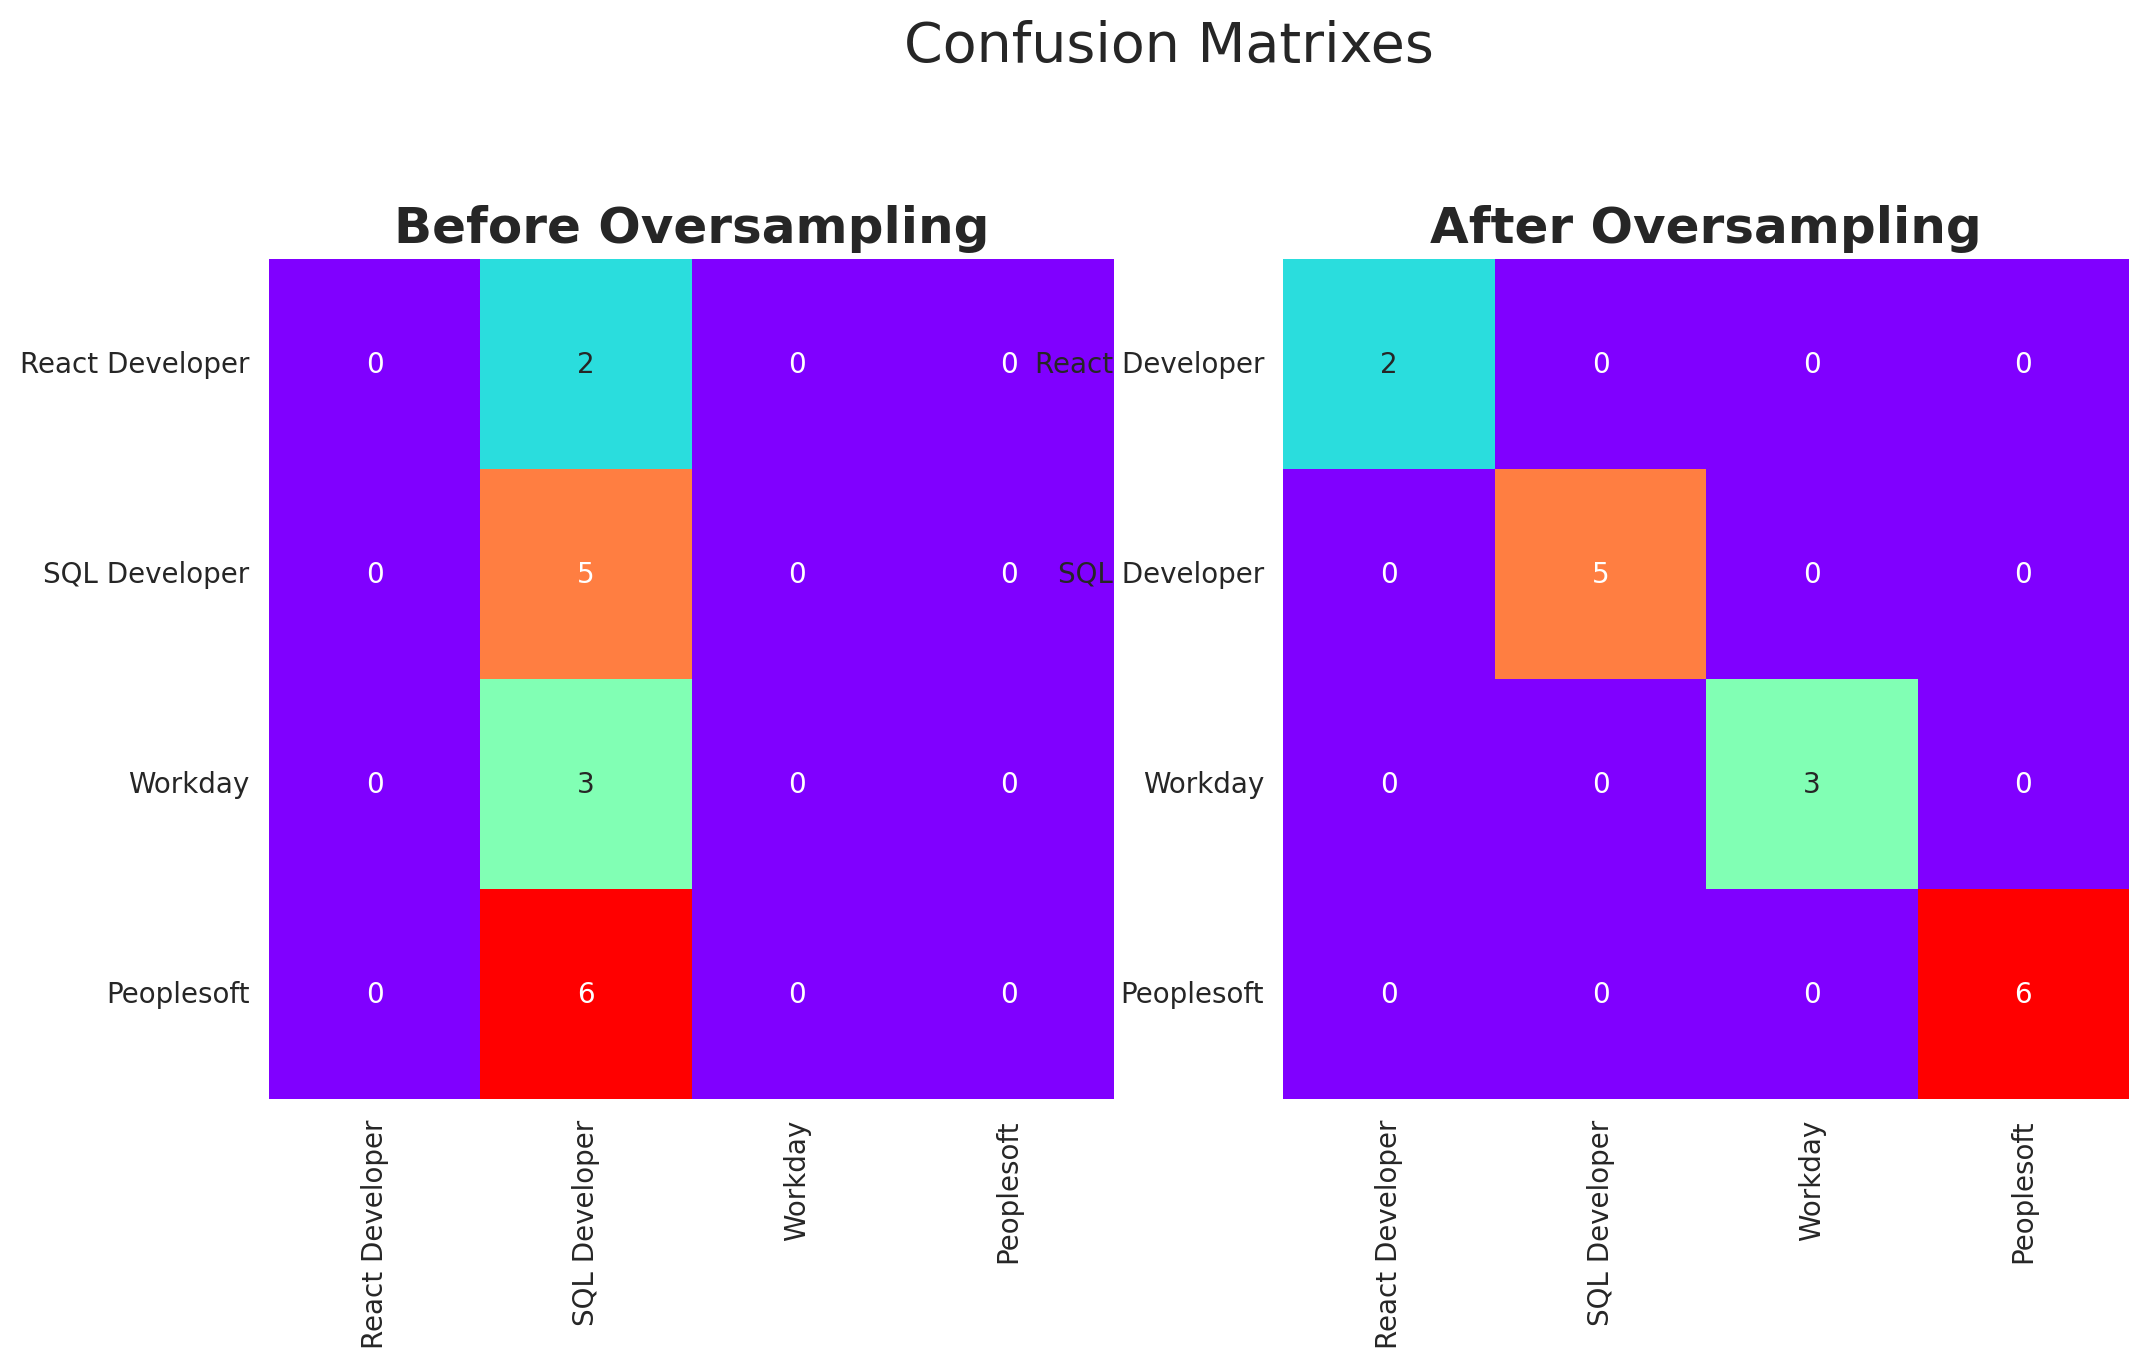

In [66]:


plt.figure(figsize=(12, 12), dpi = 200)
plt.suptitle("Confusion Matrixes", fontsize=20)

plt.subplot(2,2,1)
plt.title("Before Oversampling", fontsize = 18, fontweight = 'bold')
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.subplot(2,2,2)
plt.title("After Oversampling", fontsize = 18, fontweight = 'bold')
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.show()




5.) Decision Tree Classifier

In [67]:


dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',random_state=100)
dt_fit = dt.fit(x_train, y_train)
dt_train_prediction = dt_fit.predict(x_train)
dt_prediction = dt_fit.predict(x_test)
dt_score = dt_fit.score(x_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt_fit.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, dt_train_prediction))
print('Classification Report:\n')
print(classification_report(y_train, dt_train_prediction))
print("-----------------------------------------------------------\n")
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt_fit.score(x_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)
print(confusion_matrix(y_test, dt_prediction))
print("Classification Report:\n")
print(classification_report(y_test, dt_prediction))



Decision Tree Classification Train Accuracy: 100.0%
[[18  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00        18
React Developer       1.00      1.00      1.00        17
  SQL Developer       1.00      1.00      1.00        11
        Workday       1.00      1.00      1.00        15

       accuracy                           1.00        61
      macro avg       1.00      1.00      1.00        61
   weighted avg       1.00      1.00      1.00        61

-----------------------------------------------------------

Decision Tree Classification Test Accuracy: 93.75%
[[2 0 0 0]
 [1 4 0 0]
 [0 0 3 0]
 [0 0 0 6]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       0.67      1.00      0.80         2
React Developer       1.00      0.80      0.89         5
  SQL Developer       1.00      1.00      1.00     

In [68]:


precision_dt = round(precision_score(y_test,dt_prediction,average = 'macro'),2)
recall_dt = round(recall_score(y_test,dt_prediction, average = 'macro'),2)
f1_dt = round(f1_score(y_test,dt_prediction, average = 'macro'),2)
accuracy_dt = round(accuracy_score(y_test,dt_prediction),2)




6. Support Vector Machine

In [69]:
SVMC = SVC(random_state=42)

In [70]:
svc_param_grid = {
    'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001],
    'C': [1000, 100, 10, 1],
    'tol': [0.001, 0.0008, 0.0009, 0.0011]
}

In [71]:
gsSVMC = GridSearchCV(SVMC, param_grid=svc_param_grid, cv=10, scoring="accuracy", n_jobs=6, verbose=1)


In [72]:
gsSVMC.fit(x_train, y_train)


Fitting 10 folds for each of 256 candidates, totalling 2560 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=6,
             param_grid={'C': [1000, 100, 10, 1],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
                         'tol': [0.001, 0.0008, 0.0009, 0.0011]},
             scoring='accuracy', verbose=1)

In [73]:
svm_best = gsSVMC.best_estimator_
gsSVMC.best_score_


0.9

In [74]:


gsSVMC.best_params_



{'C': 1000, 'gamma': 1, 'kernel': 'poly', 'tol': 0.001}

In [75]:


predict_results = svm_best.predict(x_test)
np.mean(predict_results==y_test)



1.0

In [76]:


# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(x_train, y_train)



GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [77]:


# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))



GridSearch CV best score : 0.9000


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [78]:


svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm_fit = svm.fit(x_train, y_train)
svm_train_prediction = svm_fit.predict(x_train)
svm_prediction = svm_fit.predict(x_test)
svm_score = svm.score(x_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(x_train,y_train)*100,2)))
print(confusion_matrix(y_train, svm_train_prediction))
print('Classification Report:\n')
print(classification_report(y_train, svm_train_prediction))
print("-----------------------------------------------------------\n")
svm_cm = confusion_matrix(y_test, svm_prediction)
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))
print(confusion_matrix(y_test, svm_prediction))
print("Classification Report:\n")
print(classification_report(y_test, svm_prediction))



SVM Classification Train Accuracy: 100.0%
[[18  0  0  0]
 [ 0 17  0  0]
 [ 0  0 11  0]
 [ 0  0  0 15]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00        18
React Developer       1.00      1.00      1.00        17
  SQL Developer       1.00      1.00      1.00        11
        Workday       1.00      1.00      1.00        15

       accuracy                           1.00        61
      macro avg       1.00      1.00      1.00        61
   weighted avg       1.00      1.00      1.00        61

-----------------------------------------------------------

SVM Classification Test Accuracy: 100.0%
[[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 6]]
Classification Report:

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         2
React Developer       1.00      1.00      1.00         5
  SQL Developer       1.00      1.00      1.00         3
        Workda

In [79]:


precision_svm = round(precision_score(y_test,svm_prediction,average = 'macro'),2)
recall_svm = round(recall_score(y_test,svm_prediction, average = 'macro'),2)
f1_svm = round(f1_score(y_test,svm_prediction, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,svm_prediction),2)



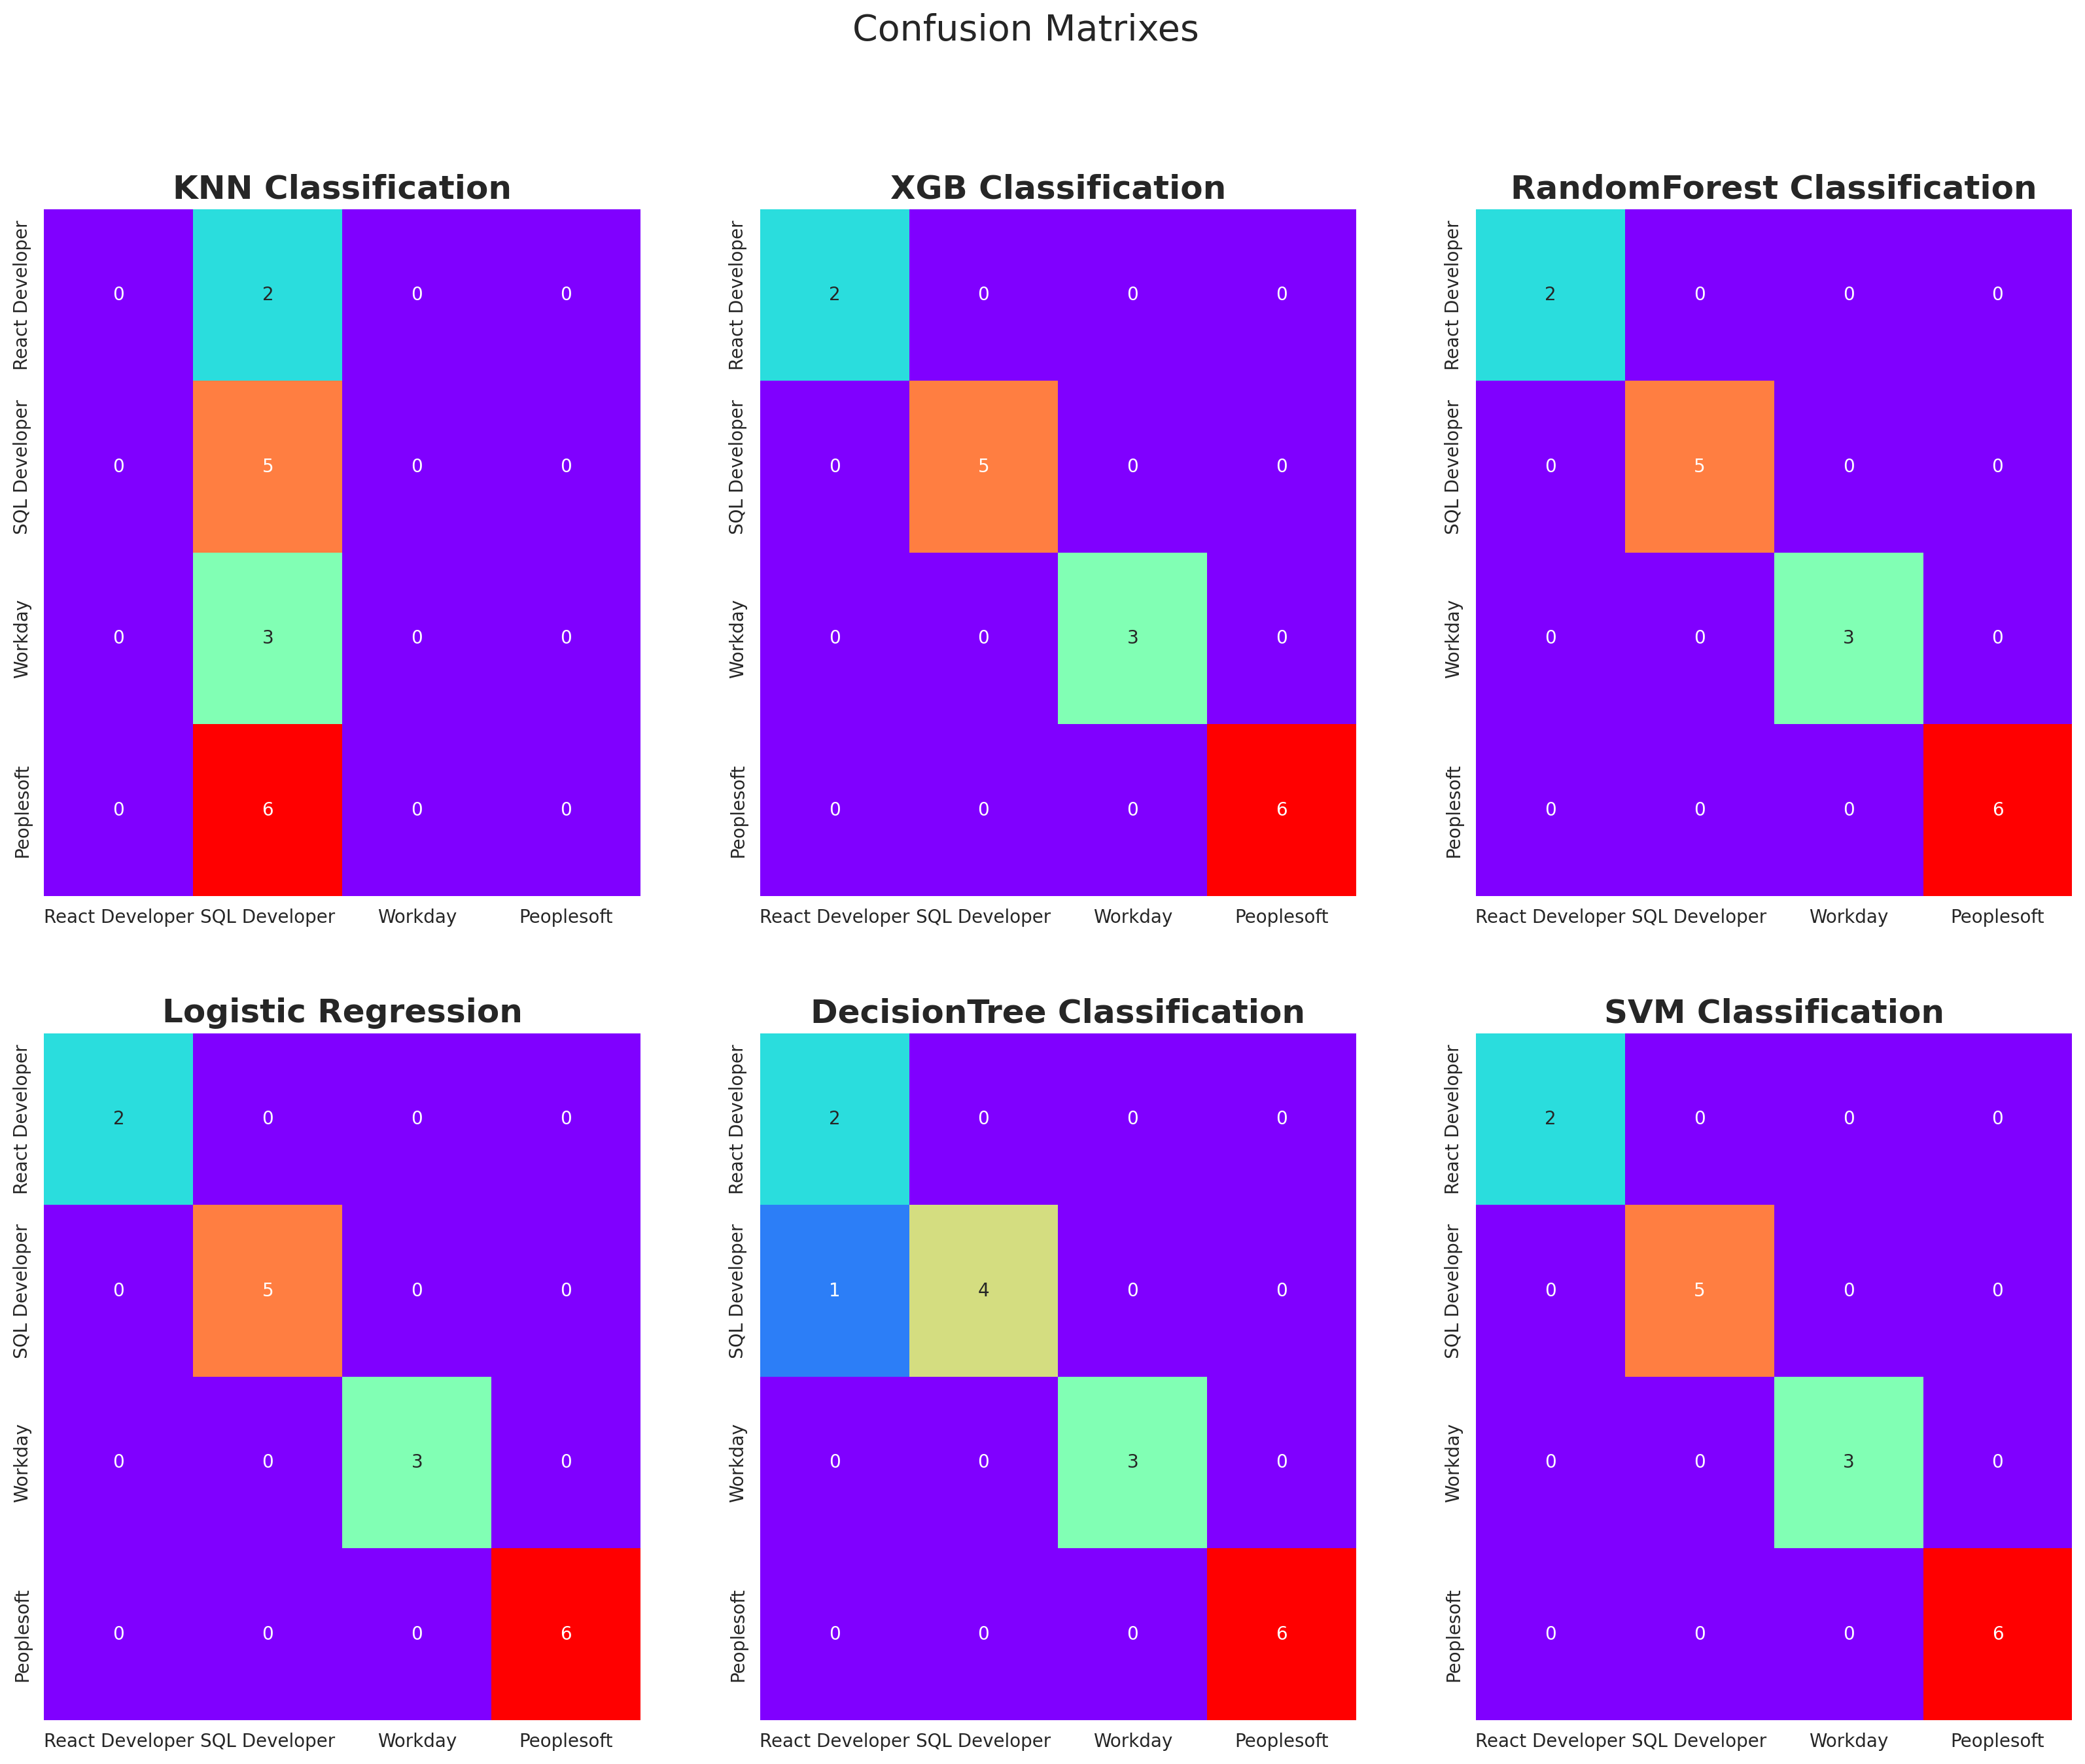

In [80]:


plt.figure(figsize=(20,15), dpi = 200)
plt.suptitle("Confusion Matrixes", fontsize=20)

plt.subplot(2,3,1)
plt.title("KNN Classification", fontsize = 18, fontweight = 'bold')
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.subplot(2,3,2)
plt.title("XGB Classification", fontsize = 18, fontweight = 'bold')
sns.heatmap(xgb_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.subplot(2,3,3)
plt.title("RandomForest Classification", fontsize = 18, fontweight = 'bold')
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.subplot(2,3,4)
plt.title("Logistic Regression", fontsize = 18, fontweight = 'bold')
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.subplot(2,3,5)
plt.title("DecisionTree Classification", fontsize = 18, fontweight = 'bold')
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.subplot(2,3,6)
plt.title("SVM Classification", fontsize = 18, fontweight = 'bold')
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="rainbow", fmt="d", xticklabels=y_test.unique(), yticklabels=y_test.unique())

plt.show()



In [86]:
import pandas as pd

Evaluation = {
    "Models": pd.Series([
        "KNN Classification",
        "XGB Classification",
        "RandomForest Classification",
        "Logistic Regression",
        "DecisionTree Classification",
        "SVM Classification"
    ]),
    "Train_Accuracy(%)": pd.Series([
        knn_fit.score(x_train, y_train),
        xgb_fit.score(x_train, y_train),
        lr_fit.score(x_train, y_train),
        dt_fit.score(x_train, y_train),
        svm_fit.score(x_train, y_train)
    ]),
    "Test_Accuracy(%)": pd.Series([
        knn_score,
        xgb_score,
        rf_score,
        lr_score,
        dt_score,
        svm_score
    ]),
    "Precision(%)": pd.Series([
        precision_knn,
        precision_xgb,
        precision_rf,
        precision_lr,
        precision_dt,
        precision_svm
    ]),
    "Recall(%)": pd.Series([
        recall_knn,
        recall_xgb,
        recall_rf,
        recall_lr,
        recall_dt,
        recall_svm
    ]),
    "F1-Score(%)": pd.Series([
        f1_knn,
        f1_xgb,
        f1_rf,
        f1_lr,
        f1_dt,
        f1_svm
    ])
}

table_evaluation = pd.DataFrame(Evaluation)
table_evaluation['Train_Accuracy(%)'] = table_evaluation['Train_Accuracy(%)'].apply(lambda x: round(x * 100, 0))
table_evaluation['Test_Accuracy(%)'] = table_evaluation['Test_Accuracy(%)'].apply(lambda x: round(x * 100, 0))
table_evaluation['Precision(%)'] = table_evaluation['Precision(%)'].apply(lambda x: round(x * 100, 0))
table_evaluation['Recall(%)'] = table_evaluation['Recall(%)'].apply(lambda x: round(x * 100, 0))
table_evaluation['F1-Score(%)'] = table_evaluation['F1-Score(%)'].apply(lambda x: round(x * 100, 0))
table_evaluation.sort_values(['Test_Accuracy(%)'], inplace=True, ignore_index=True)

table_evaluation


,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classification,74.0,31.0,8.0,25.0,12.0
1,DecisionTree Classification,100.0,94.0,92.0,95.0,92.0
2,XGB Classification,100.0,100.0,100.0,100.0,100.0
3,RandomForest Classification,100.0,100.0,100.0,100.0,100.0
4,Logistic Regression,100.0,100.0,100.0,100.0,100.0
5,SVM Classification,NaN,100.0,100.0,100.0,100.0


In [90]:
random_forest = pd.DataFrame({"Metrics": pd.Series(['Train_Accuracy(%)','Test_Accuracy(%)','Precision(%)','Recall(%)','F1-Score(%)']),
                        "Random Forest": pd.Series([rf_score,accuracy_rf, precision_rf, recall_rf, f1_rf])})
random_forest['Random Forest'] = random_forest['Random Forest'].apply(lambda x: round(x*100,0))

random_forest.to_csv('model_evaluation.csv', index = False)
random_forest

,Metrics,Random Forest
0,Train_Accuracy(%),100.0
1,Test_Accuracy(%),100.0
2,Precision(%),100.0
3,Recall(%),100.0
4,F1-Score(%),100.0


In [91]:


pd.read_csv('/content/model_evaluation.csv')



,Metrics,Random Forest
0,Train_Accuracy(%),100.0
1,Test_Accuracy(%),100.0
2,Precision(%),100.0
3,Recall(%),100.0
4,F1-Score(%),100.0


In [92]:


logistic = table_evaluation[table_evaluation['Models']=='Logistic Regression']
logistic = logistic.T
logistic.reset_index(inplace=True)
logistic.columns = logistic.iloc[0]
logistic.drop(logistic.index[0], inplace=True)
logistic.rename({'Models':'Metrics'}, axis=1, inplace=True)
logistic



,Metrics,Logistic Regression
1,Train_Accuracy(%),100.0
2,Test_Accuracy(%),100.0
3,Precision(%),100.0
4,Recall(%),100.0
5,F1-Score(%),100.0


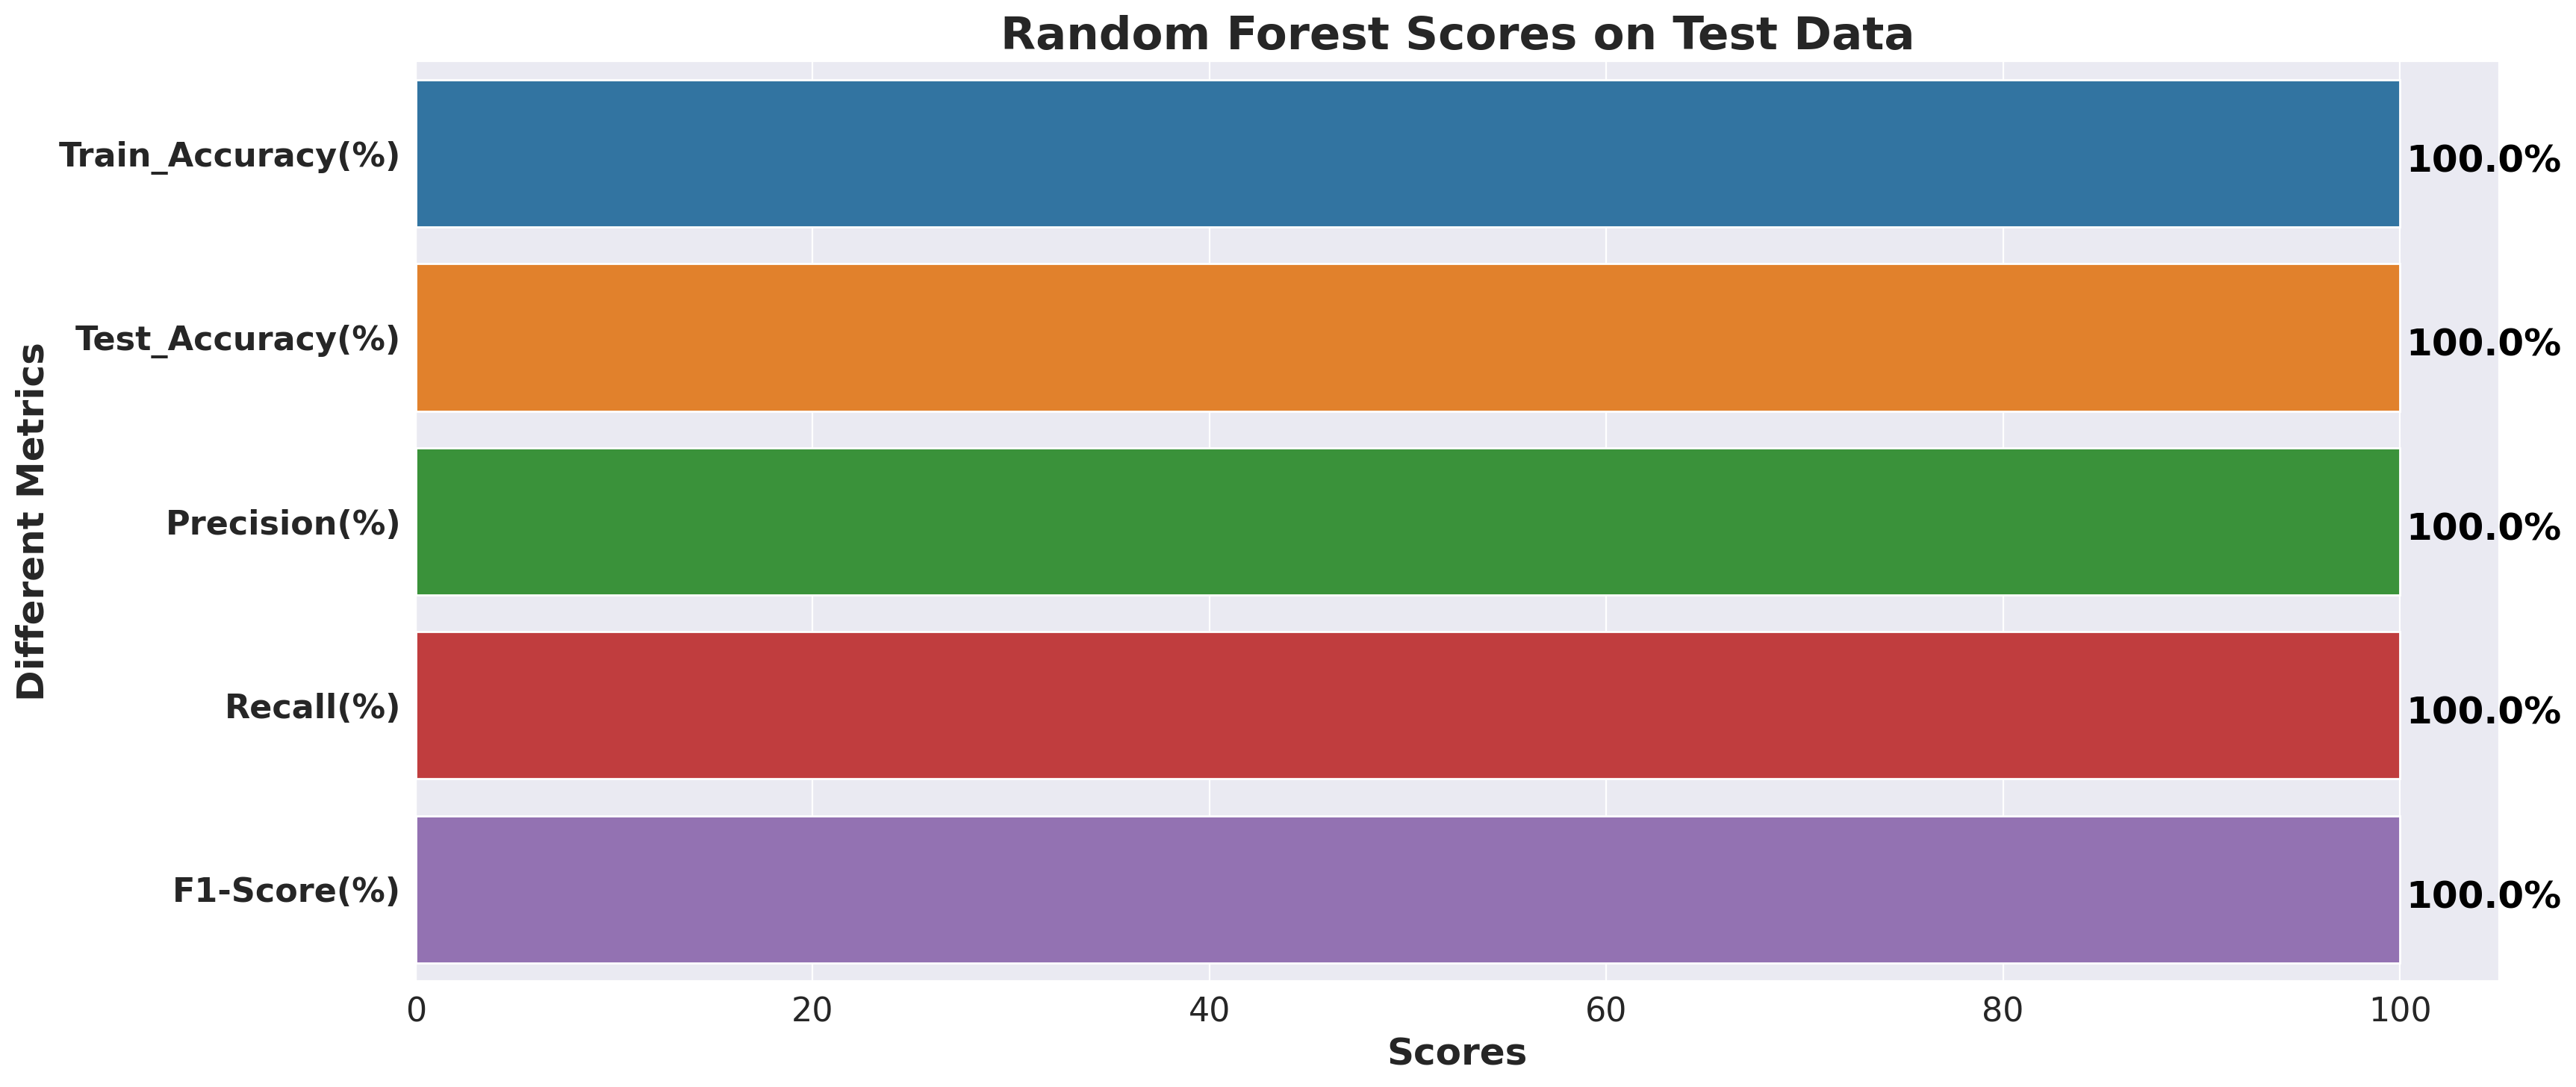

In [93]:


f, axe = plt.subplots(1,1, figsize=(18,8), dpi=200)
sns.barplot(x='Random Forest', y='Metrics', data=random_forest, ax = axe)
axe.set_xlabel('Scores', size=18, fontweight = 'bold')
axe.set_ylabel('Different Metrics', size=18, fontweight = 'bold')
plt.title("Random Forest Scores on Test Data", size=22, fontweight = 'bold' )
plt.yticks(fontsize=16,fontweight = 'bold')
plt.xticks(fontsize=16)

for i, v in enumerate(random_forest['Random Forest'].values):
    axe.text(v + 0.3 , i + .10, str(v)+'%',
            color = 'black', fontweight = 'bold', fontsize= 18)

plt.show()



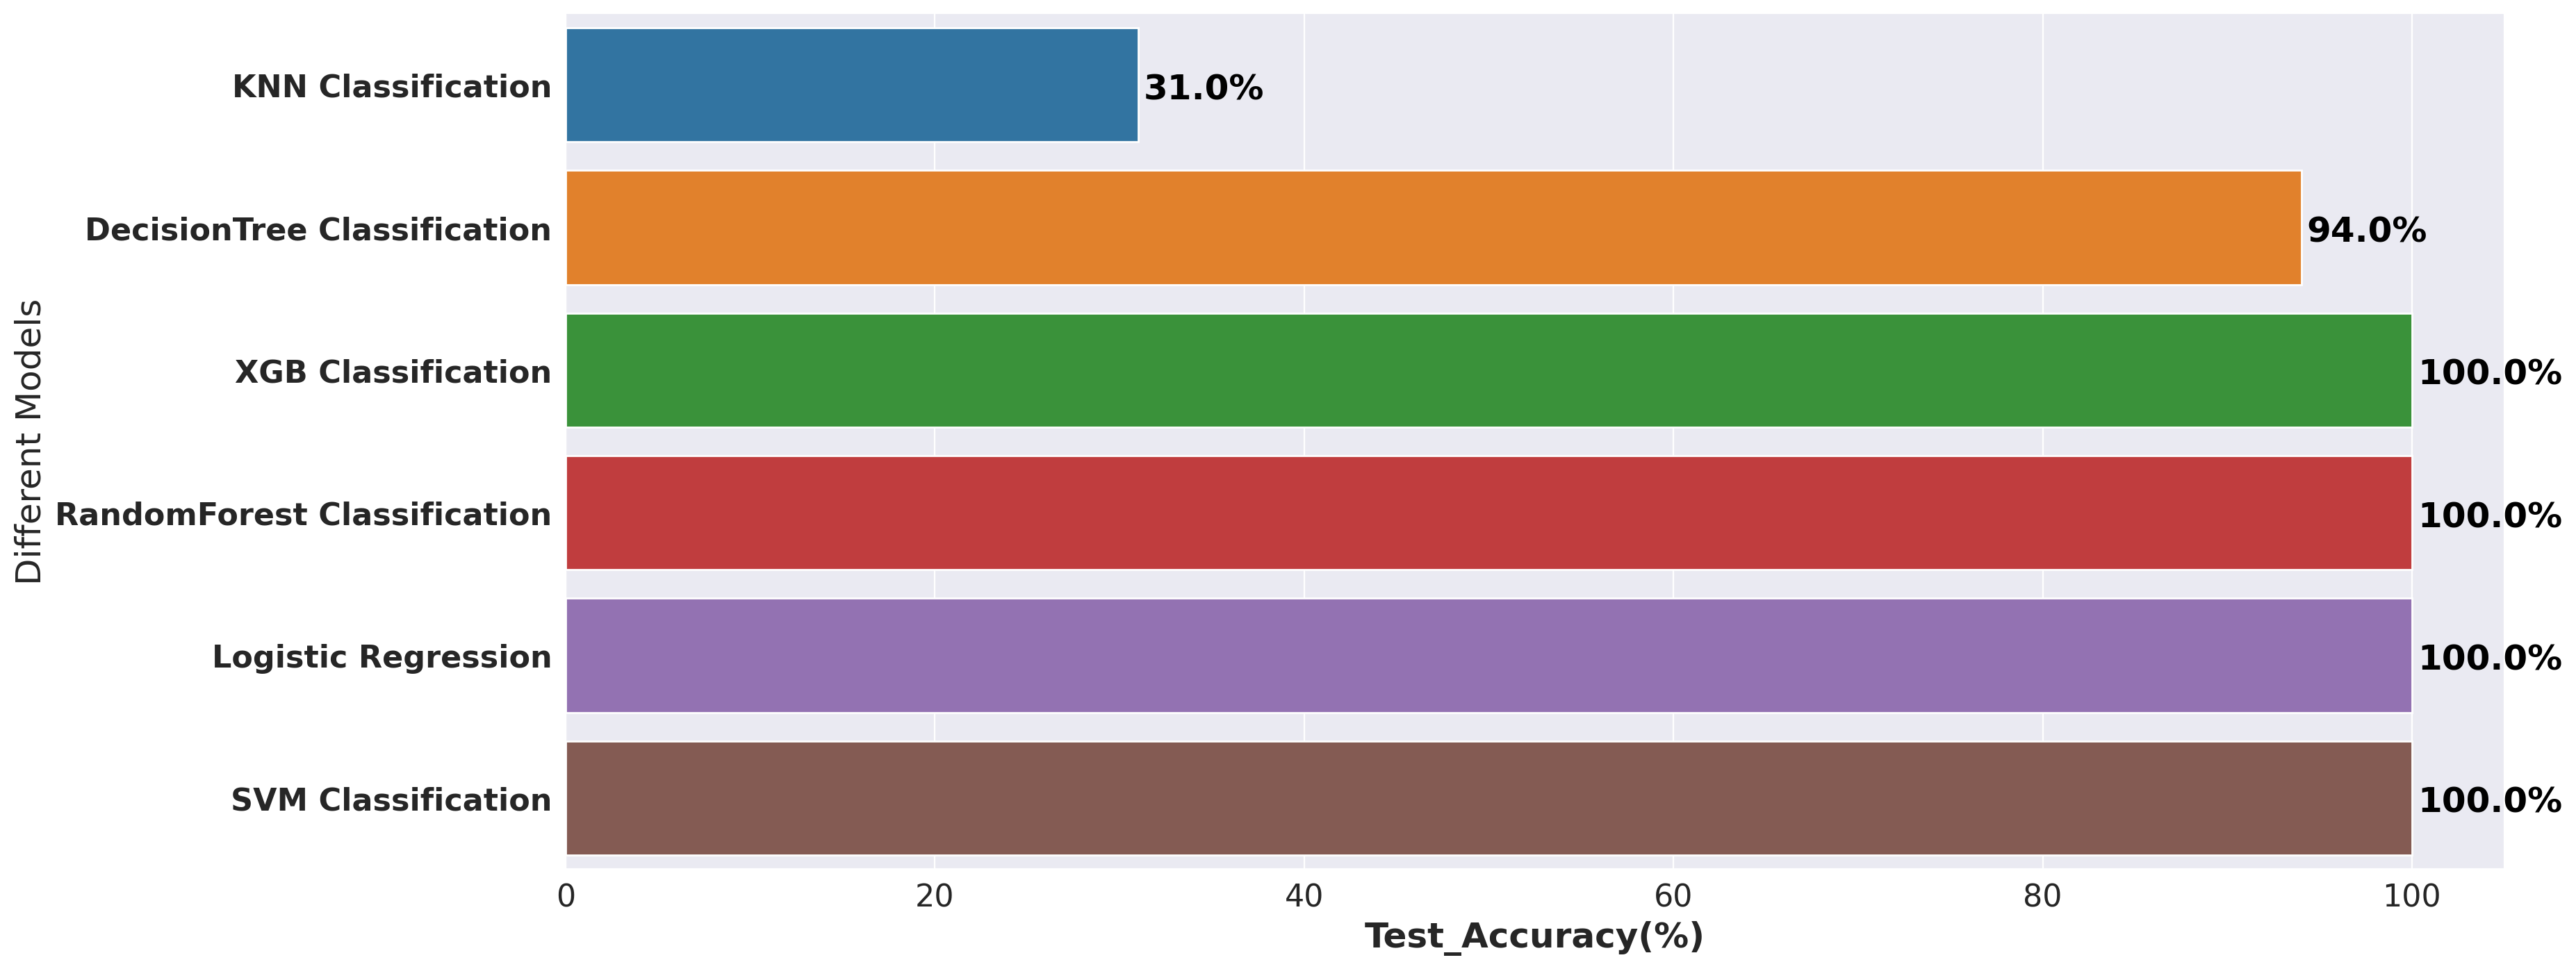

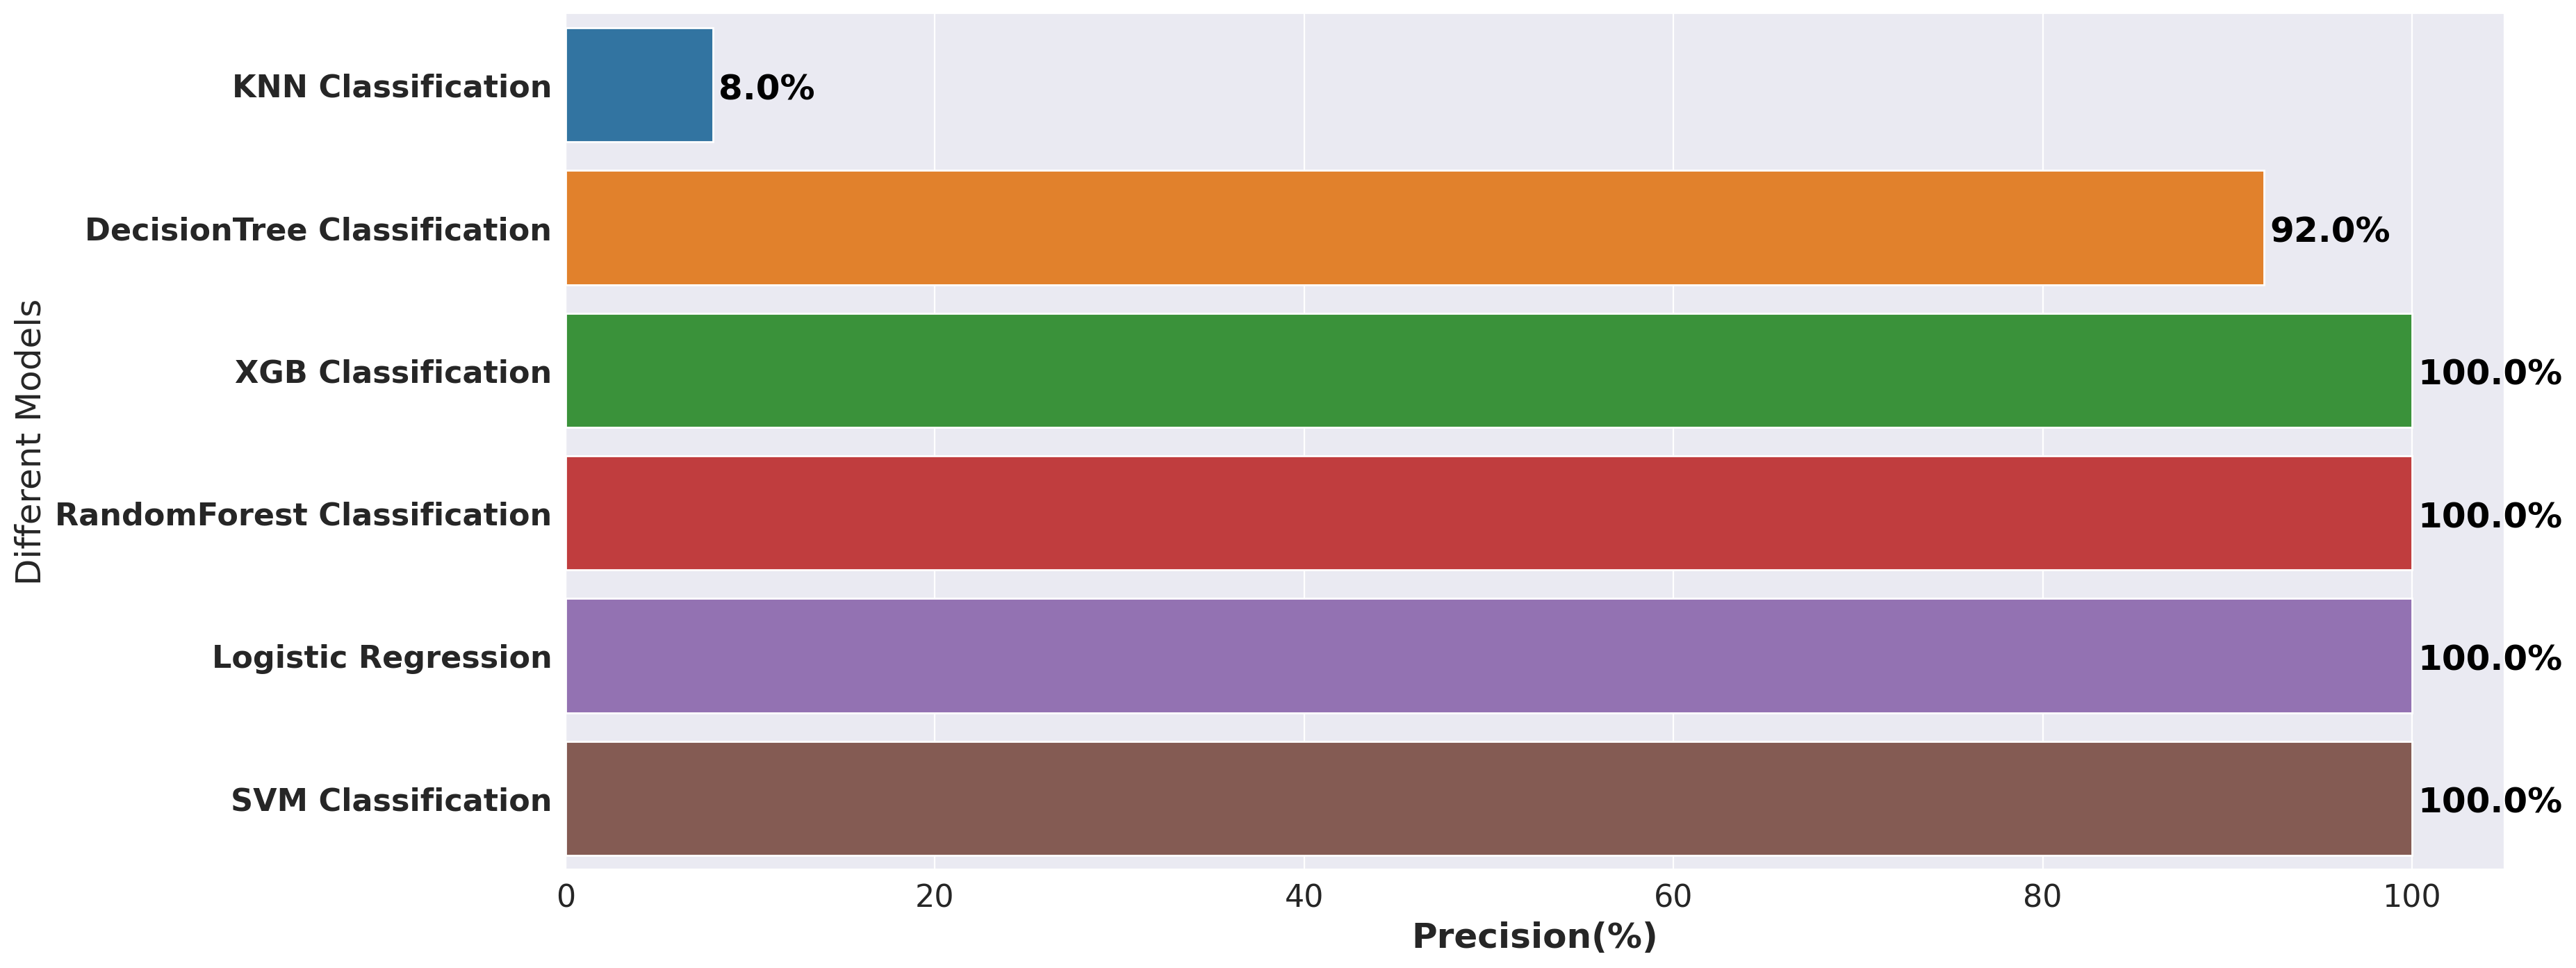

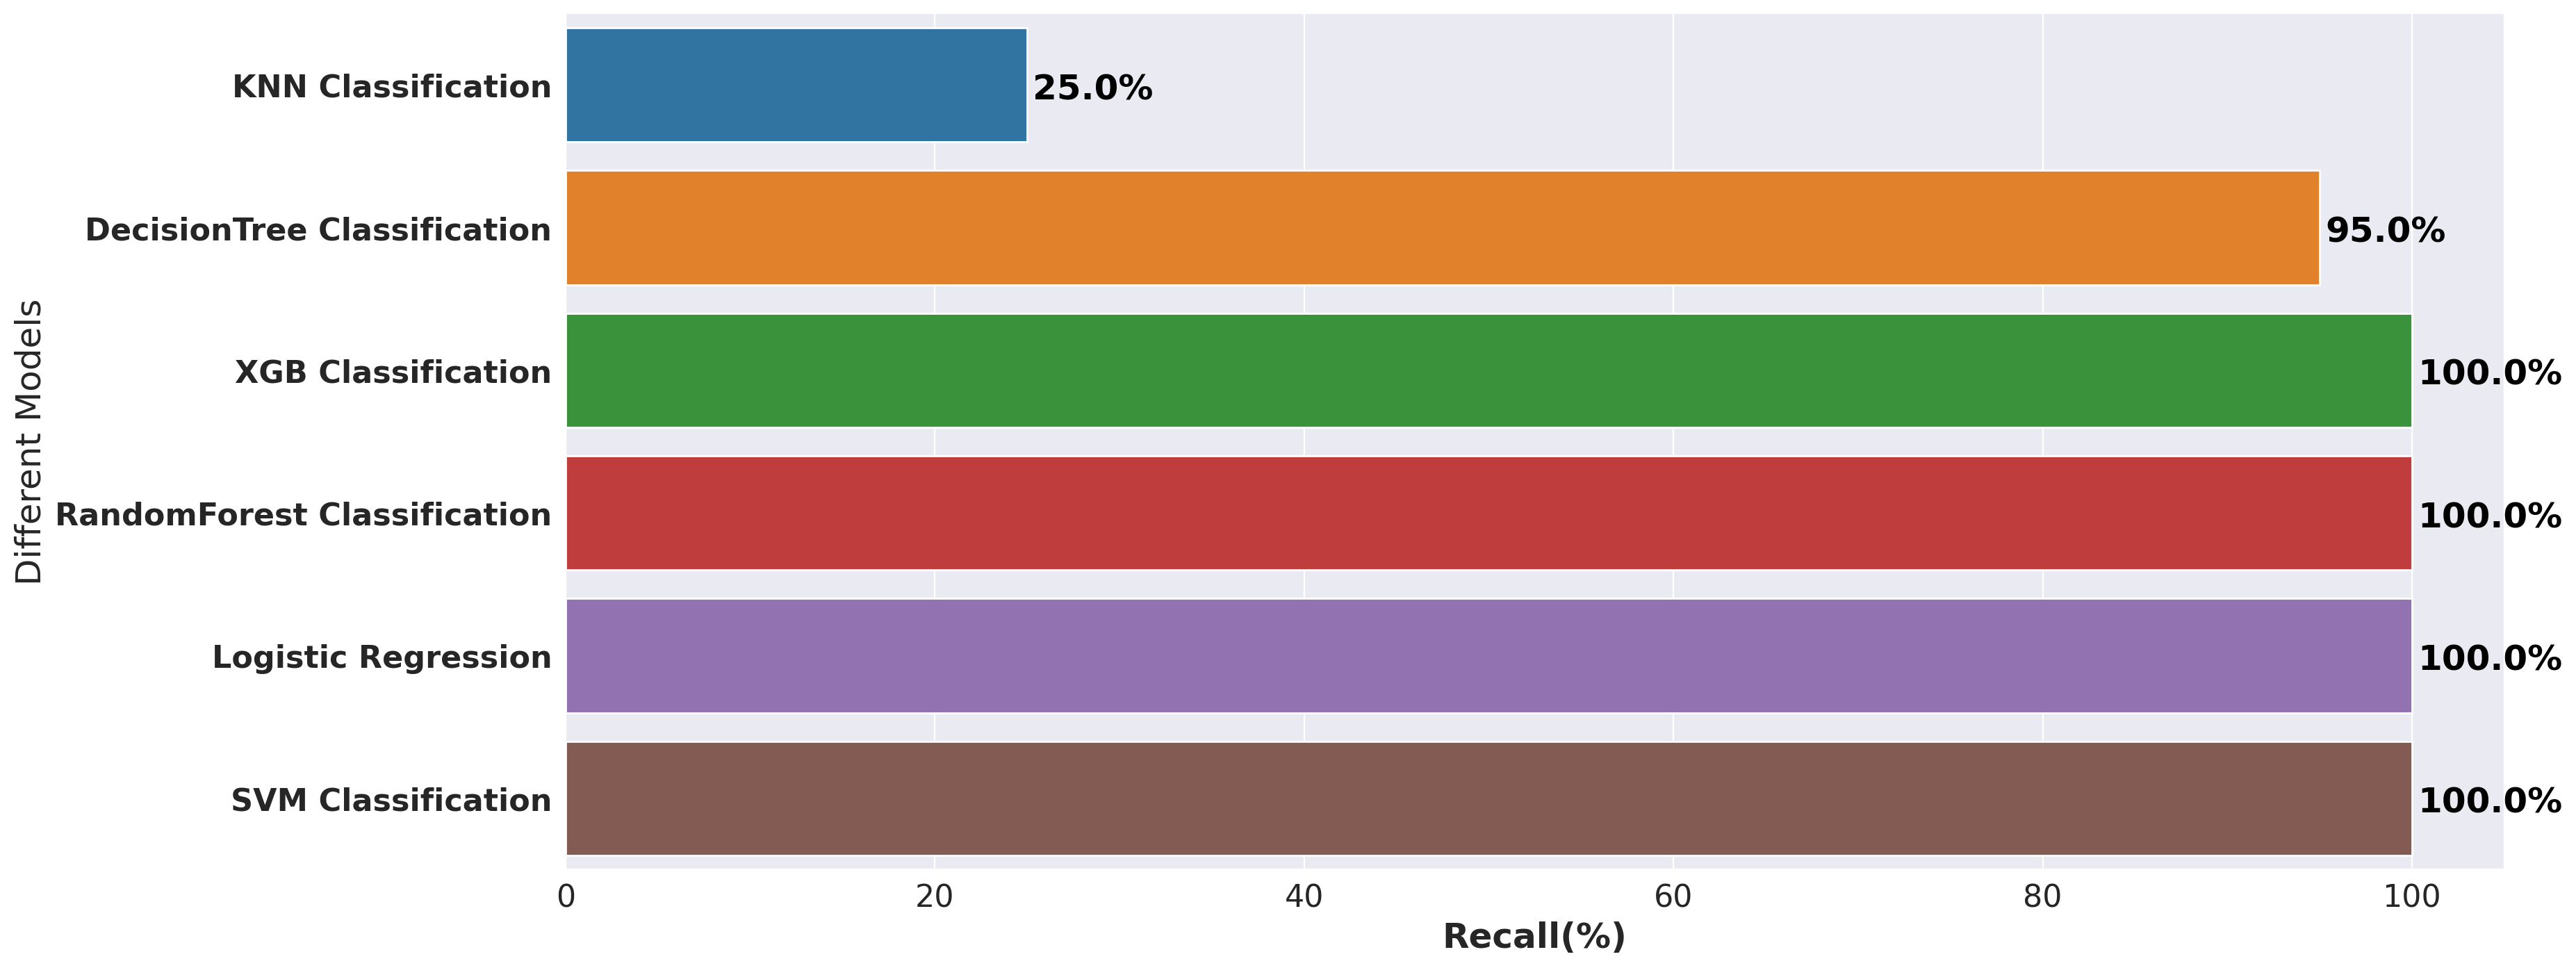

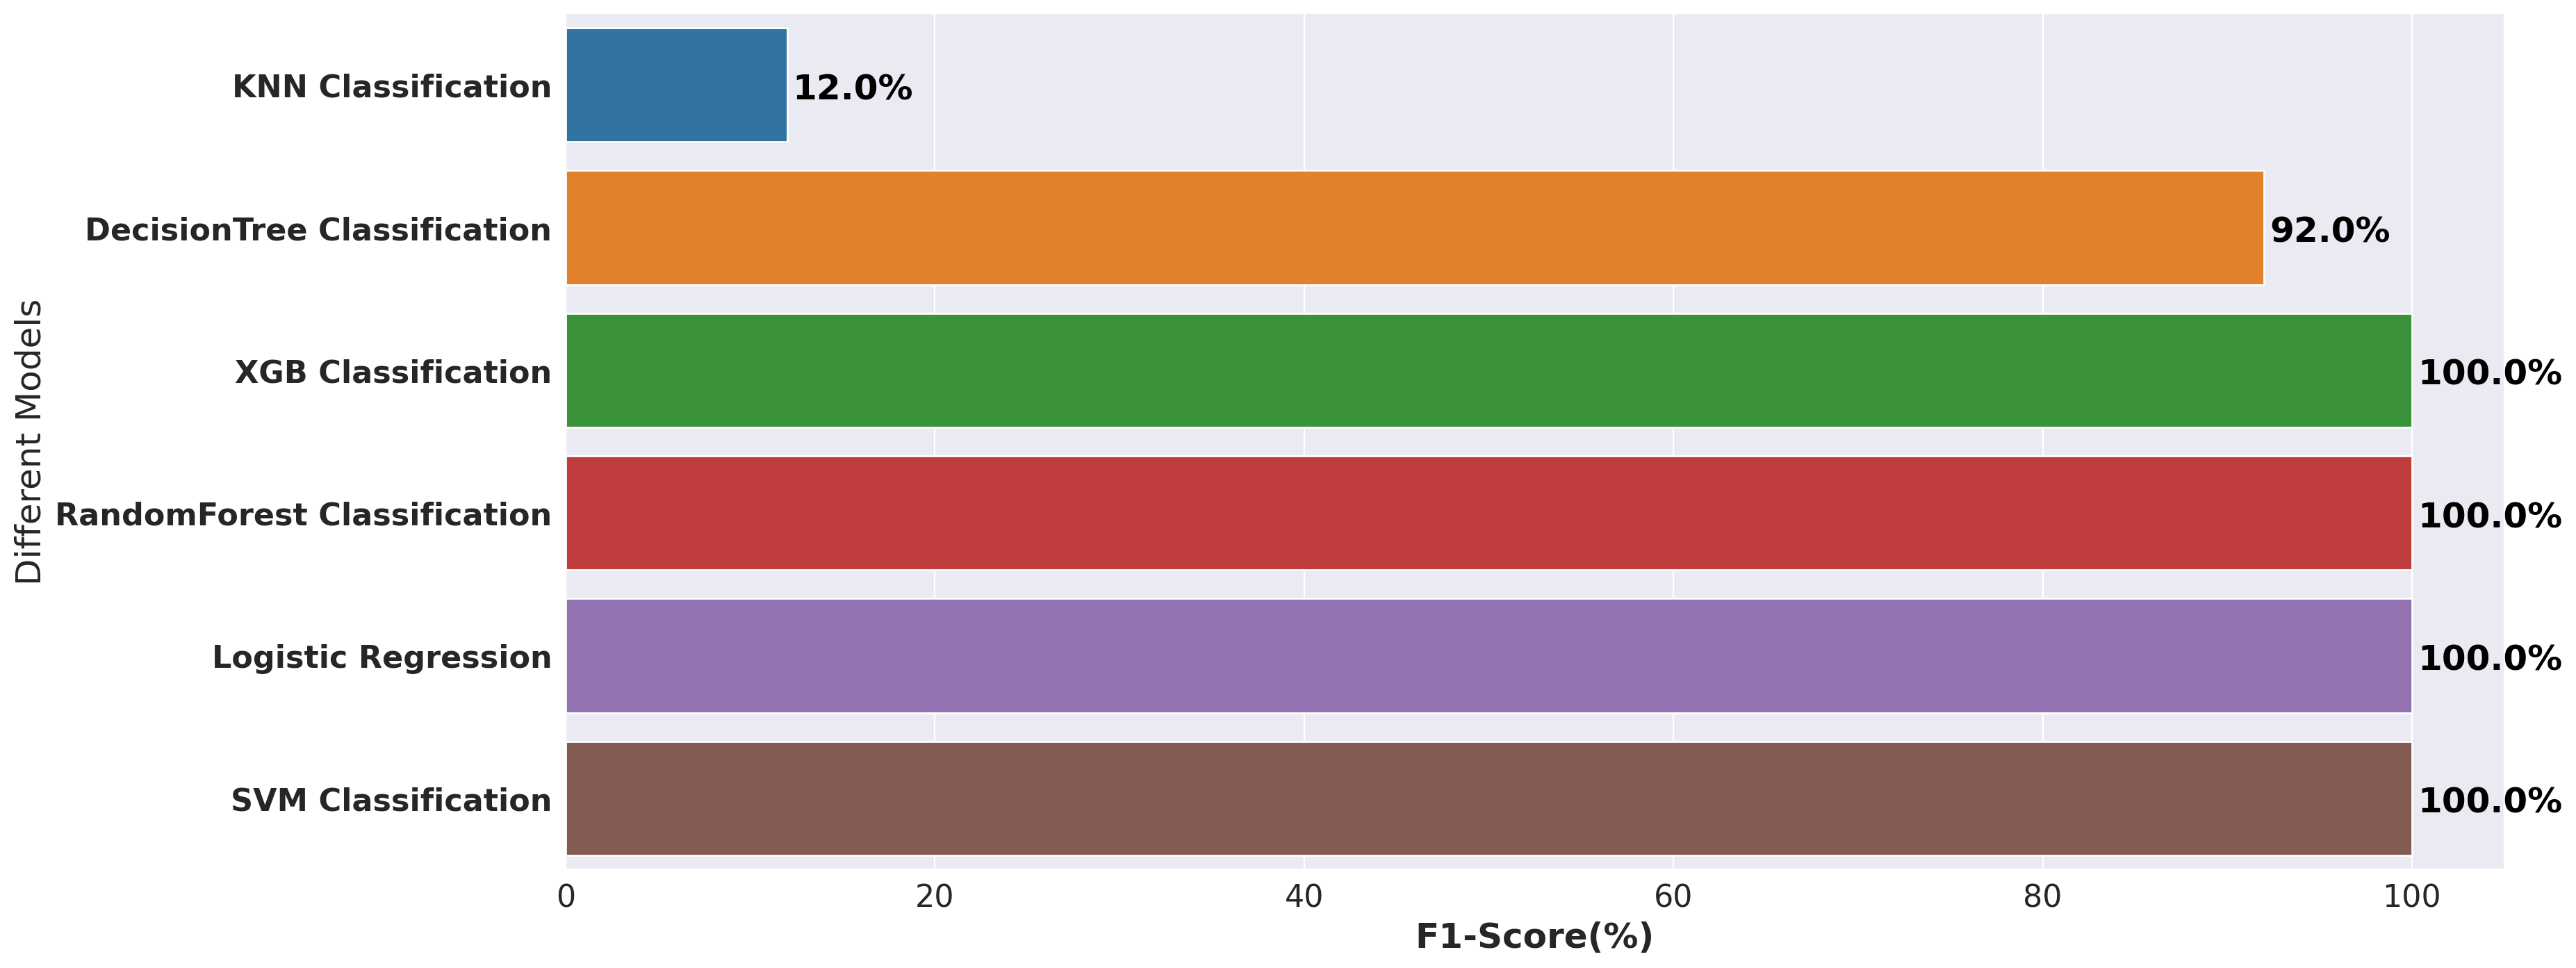

In [94]:


for column in table_evaluation.columns[2:]:
    f, axe = plt.subplots(1,1, figsize=(18,8), dpi=200)
    sns.barplot(x=column, y='Models', data=table_evaluation, ax = axe)
    axe.set_xlabel(column, size=18,fontweight = 'bold')
    axe.set_ylabel('Different Models', size=18)
    plt.yticks(fontsize=16,fontweight = 'bold')
    plt.xticks(fontsize=16)

    for i, v in enumerate(table_evaluation[column].values):
        axe.text(v + 0.3 , i + .10, str(v)+'%',
                    color = 'black', fontweight = 'bold', fontsize= 18)

    plt.show()



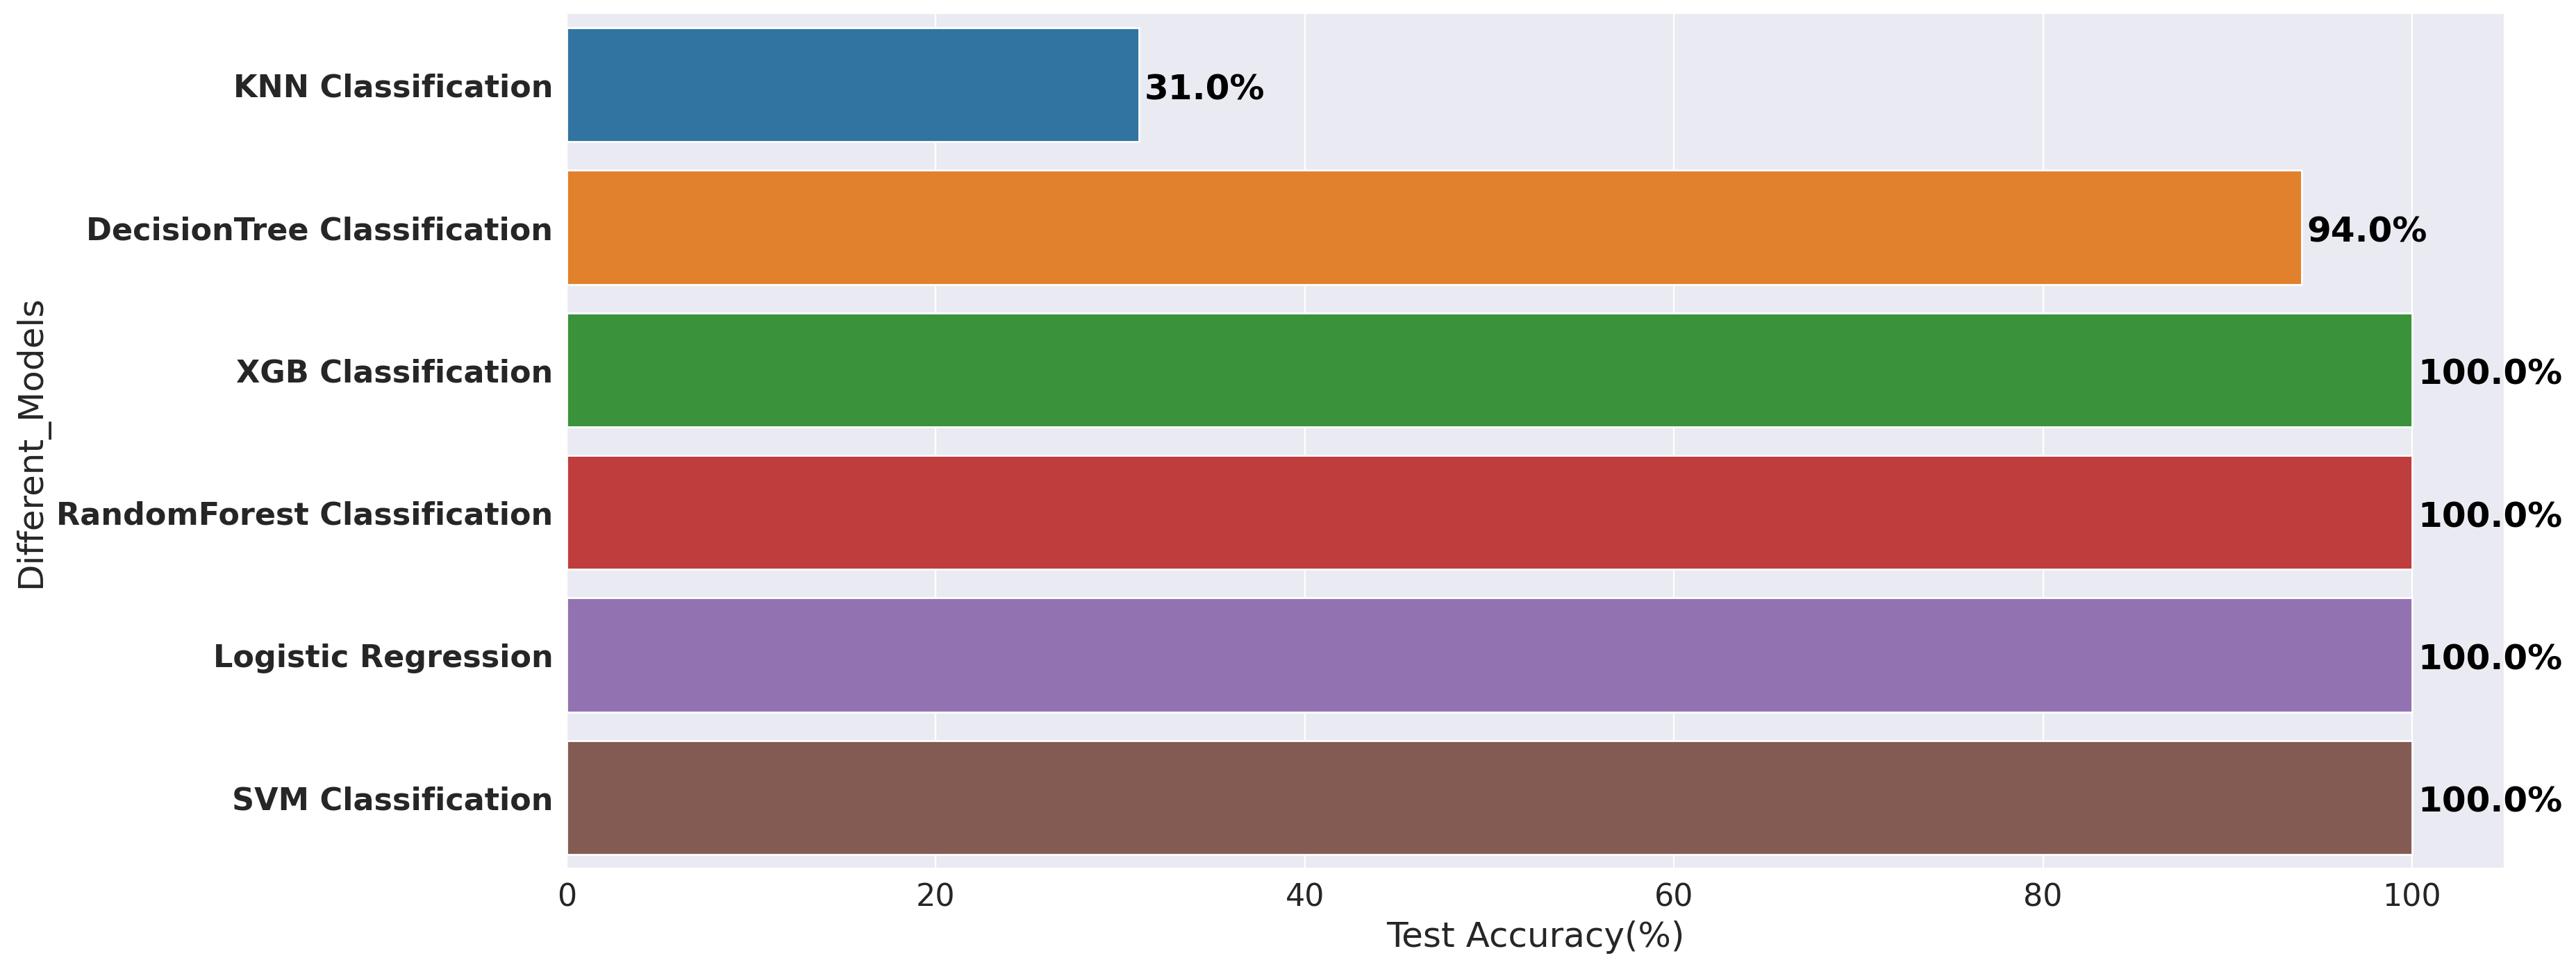

In [95]:


f, axe = plt.subplots(1,1, figsize=(18,8), dpi=200)
sns.barplot(x='Test_Accuracy(%)', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Test Accuracy(%)', size=18)
axe.set_ylabel('Different_Models', size=18)
plt.yticks(fontsize=16,fontweight = 'bold')
plt.xticks(fontsize=16)

for i, v in enumerate(table_evaluation['Test_Accuracy(%)'].values):
    axe.text(v + 0.3 , i + .10, str(v)+'%',
            color = 'black', fontweight = 'bold', fontsize= 18)

plt.show()



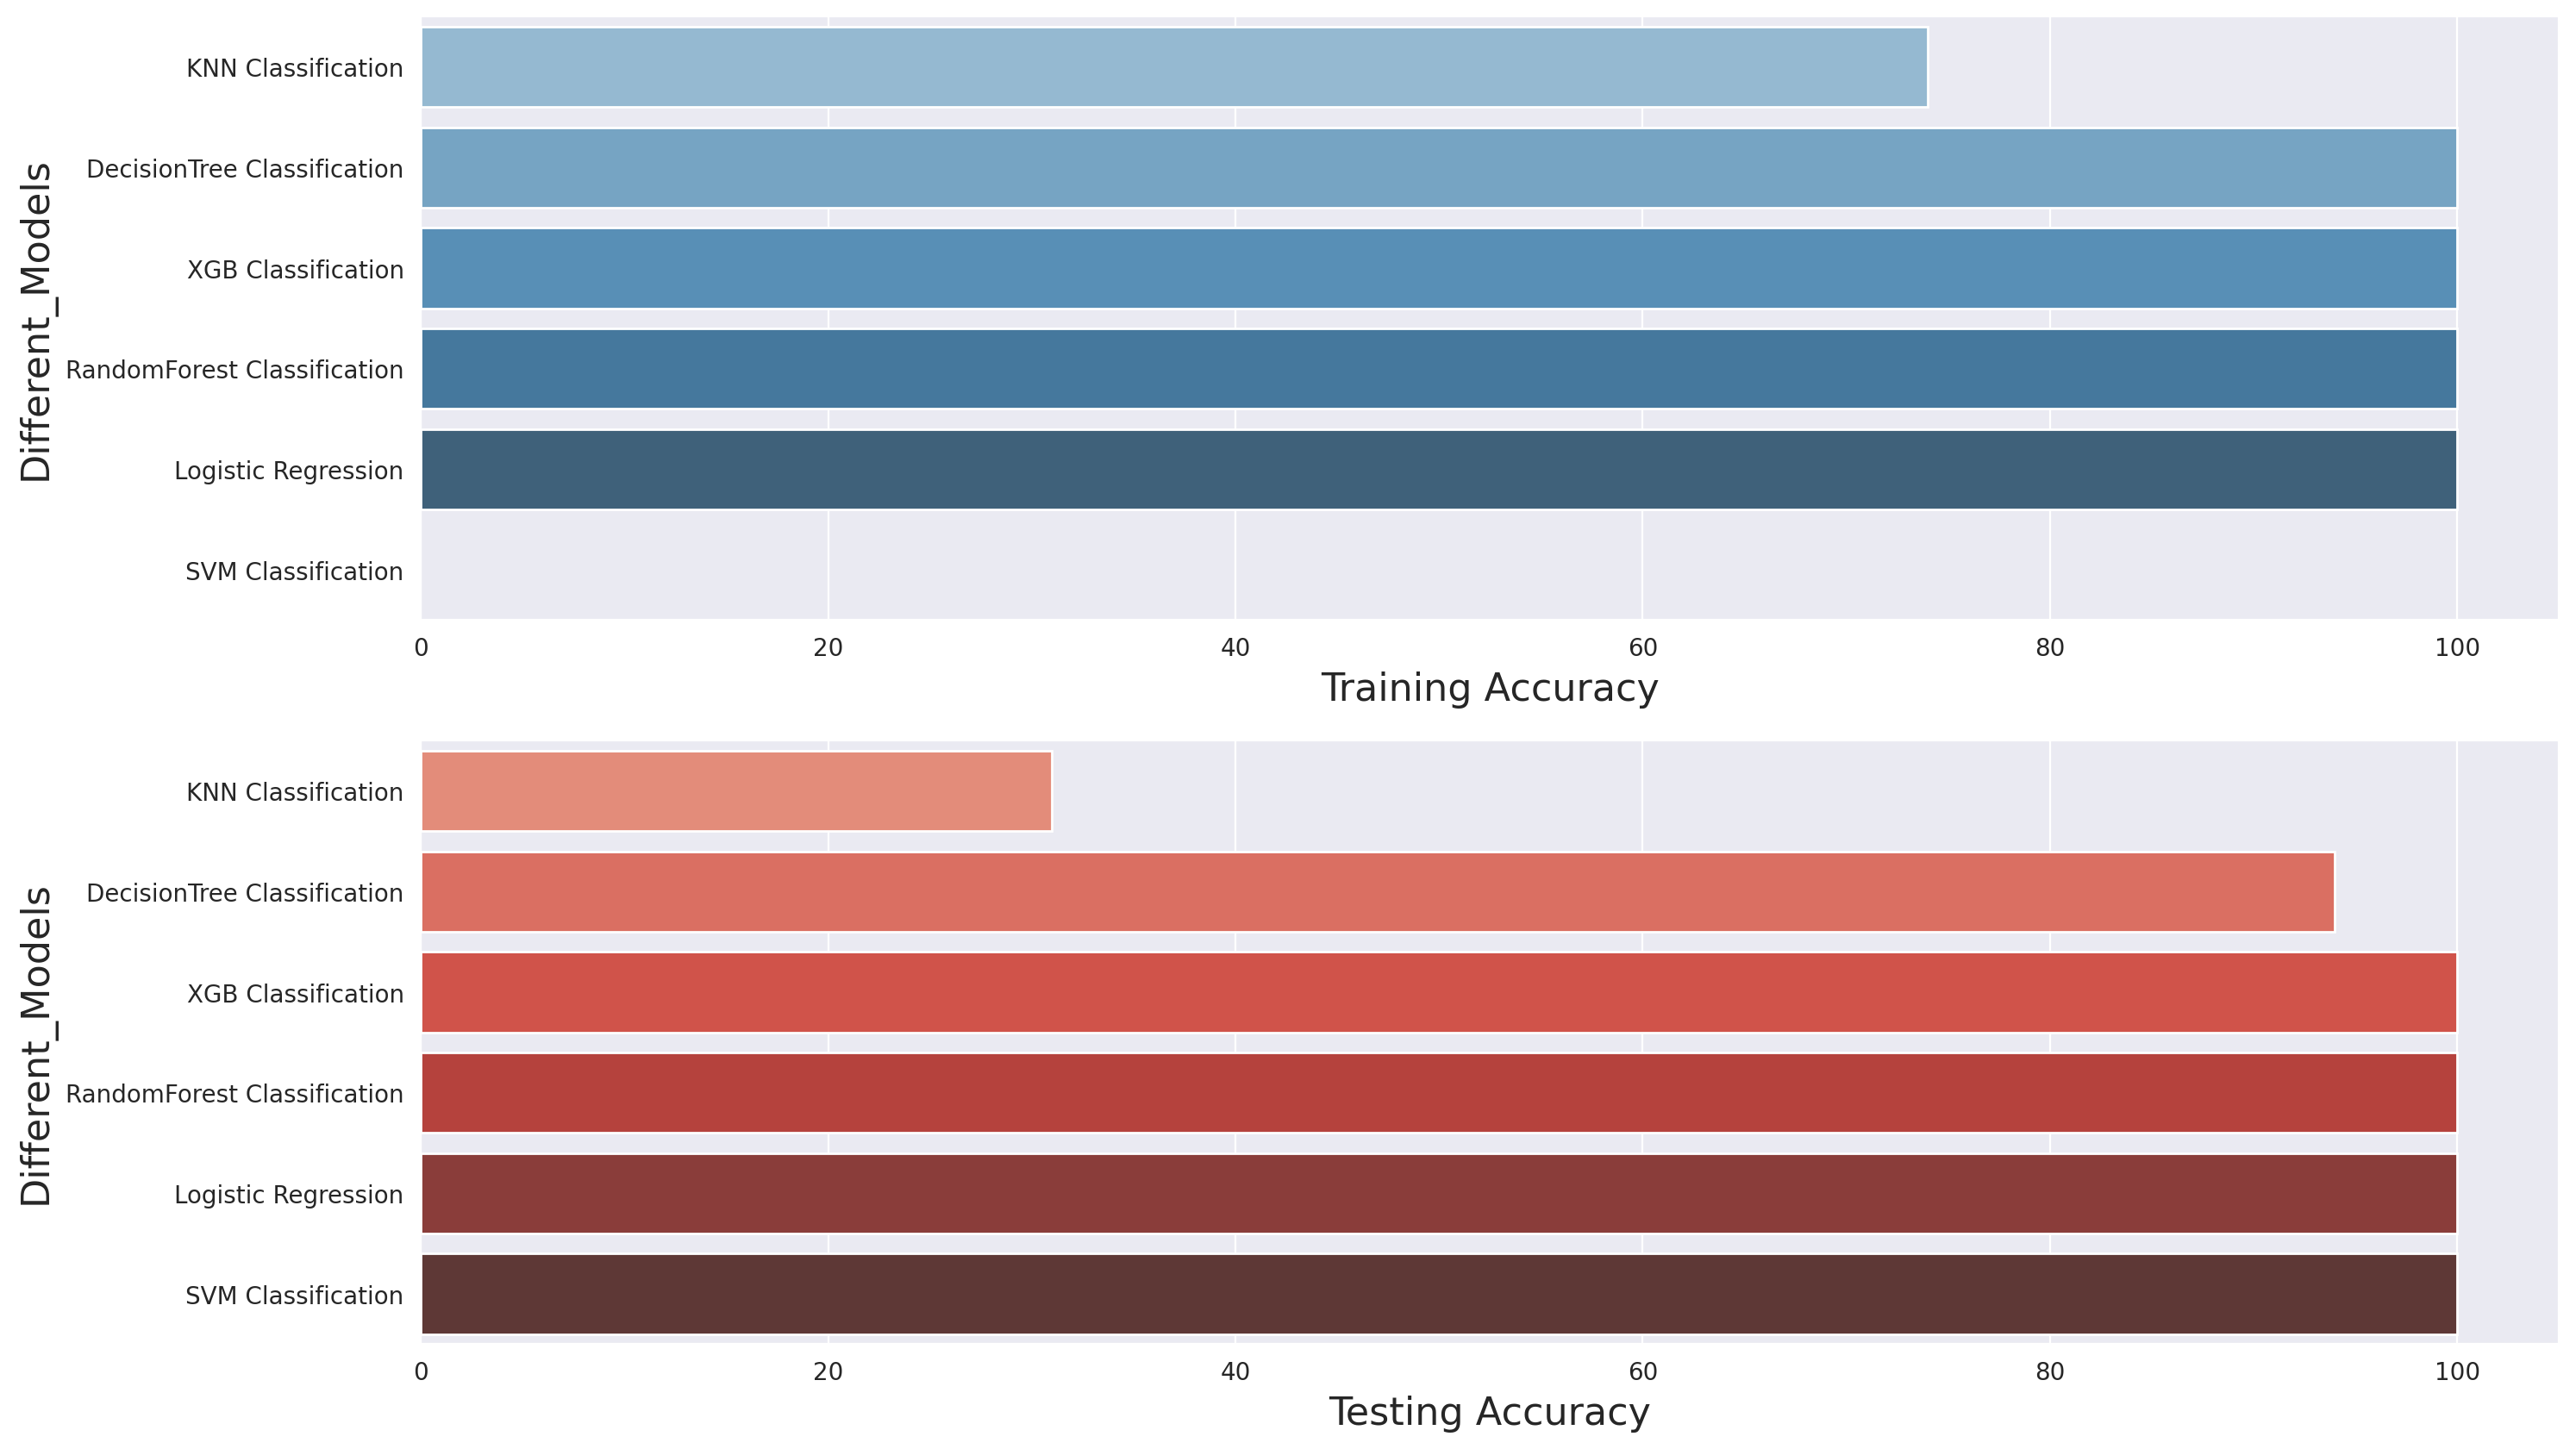

In [96]:


f, axes = plt.subplots(2,1, figsize=(16,10), dpi=200)
# train_rmse = table_evaluation.sort_values(by=['Test_Accuracy(%)'], ascending=True)

sns.barplot(x='Train_Accuracy(%)', y='Models', data = table_evaluation, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Different_Models', size=16)

# test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=True)

sns.barplot(x='Test_Accuracy(%)', y='Models', data = table_evaluation, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing Accuracy', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()




Training the best model on Basis of Accuracy which is Logistic Regression on Complete Dataset

In [103]:

lr = LogisticRegression(class_weight ='balanced',multi_class='ovr',solver='lbfgs',C=100.0)
lr_fit = lr.fit(x_sm_encoded, y_sm)




In [104]:
rf =RandomForestClassifier(n_estimators=195,min_samples_split=2, min_samples_leaf=4,criterion='entropy',
                           max_depth=50, max_features='auto',random_state=42, bootstrap=True,
                           class_weight="balanced")
rf_fit = rf.fit( x_sm_encoded, y_sm)


Making Pickle file and saving on our disk

In [105]:



# Saving the pickle file
import pickle
pickle.dump(rf_fit, open('resume_classification.pkl','wb'))



In [106]:


# Saving the pickle file
import pickle
pickle.dump(lr_fit, open('resume_classification.pkl','wb'))

